# Project 4 : Regression Analysis and Define Your Own Task!

### Introduction:

Regression  analysis  is  a  statistical  procedure  for  estimating  the  relationship  between  a 
target variable and a set of features that jointly inform about the target.  In this project, 
we  explore  specific-to-regression f eature e ngineering m ethods a nd m odel s election that 
jointly  improve  the  performance  of  regression.  You  will  conduct  different experiments 
and identify the relative significance o f t he d ifferent options.

### Dataset:

There are three data-set which will be used for this project:

####  Dataset  1:  Diamond  Characteristics

A synthetic diamonds dataset can be downloaded from this [link](https://drive.google.com/file/d/1gofVOyha91l5ze5clqS2FJE_MEXTdsEM/view). This dataset contains information about 53, 940 round-cut diamonds. There are 10 variables (features) and for each sample, these features specify the various properties of the sample.

#### Dataset 2: Gas Turbine CO and NOx Emission Data Set

This dataset can be downloaded from this [link](https://archive-beta.ics.uci.edu/ml/datasets/gas+turbine+co+and+nox+emission+data+set). The dataset contains 36733 instances of 11 sensor measurements aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey’s north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2). There are 5 CSV files for each year. Concatenate all data points and add a column for the corresponding year and treat it as a categorical feature.<br>
**Note:** There are two types of gas studied in this project: `"Nox"` and `"CO".` We are picking `"CO"` type for our task.

#### Dataset 3: Twitter Data

Twitter data can be downloaded from this [link](https://ucla.app.box.com/s/24oxnhsoj6kpxhl6gyvuck25i3s4426d). The data consists of 6 text files, each one containing tweet data from one hashtag as indicated in the filenames.



In [1]:
# Import all required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# import the data

# Import all 5 data file of emission and merge it
emission_data11 = pd.read_csv('pp_gas_emission/gt_2011.csv')
emission_data11.insert(loc=0, column='Year', value='2011')

emission_data12 = pd.read_csv('pp_gas_emission/gt_2012.csv')
emission_data12.insert(loc=0, column='Year', value='2012')

emission_data13 = pd.read_csv('pp_gas_emission/gt_2013.csv')
emission_data13.insert(loc=0, column='Year', value='2013')

emission_data14 = pd.read_csv('pp_gas_emission/gt_2014.csv')
emission_data14.insert(loc=0, column='Year', value='2014')

emission_data15 = pd.read_csv('pp_gas_emission/gt_2015.csv')
emission_data15.insert(loc=0, column='Year', value='2015')

emission_data = pd.concat([emission_data11,emission_data12,
                            emission_data13,emission_data14,
                            emission_data15],ignore_index=True)
emission_data = emission_data.reset_index(drop=True)
emission_data = emission_data.drop(columns=['NOX'])

# import diamond data into dataframe
diamond_data = pd.read_csv("diamonds.csv")
diamond_data_main = diamond_data.drop(columns=['Unnamed: 0'])
diamond_data = diamond_data_main.copy()
diamond_data.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31


### Question 1 : Standardization

Standardization of datasets is a common requirement for many machine learning estimators; they might behave badly if the individual features do not more-or-less look like
standard normally distributed data: Gaussian with zero mean and unit variance. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

Standardize feature columns and prepare them for training.

In [3]:
from sklearn.preprocessing import Normalizer

def standardization(data,columns):
    scaler = Normalizer()
    data[columns] = scaler.fit_transform(data[columns])
    return data

diamond_std_cols = ['carat','depth','table','x','y','z']
diamond_data_std = standardization(diamond_data,diamond_std_cols)


def get_X_y():
    X = diamond_data_main.copy().drop(columns=['price'])
    y = diamond_data_main['price'].copy()
    return X,y


### Question 2 :
Plot a heatmap of the Pearson correlation matrix of the dataset columns. Report which features have the highest absolute correlation with the target variable. In the context of each dataset, describe what this high correlation suggests.

Text(0.5, 1.0, 'Pearson Correlation of Diamond Data')

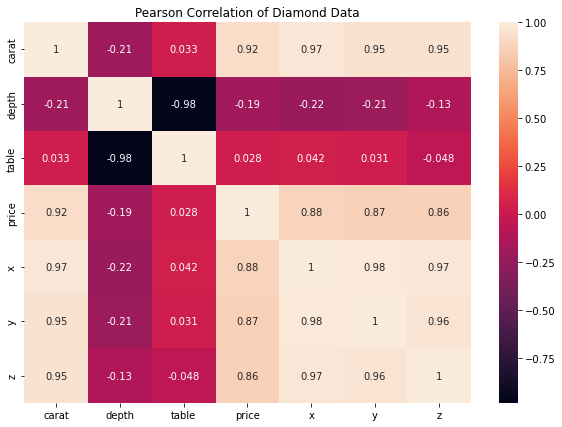

In [4]:
emission_numeric_cols = ['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO']
diamond_numeric_cols = ['carat','depth','table','price','x','y','z']

# Apply pearson correlation and plot heat map of the resulted correlation matrix

#fig,axs = plt.subplots(1,2,figsize=(25,7))
#axs = axs.flatten()

#sns.heatmap(emission_data[emission_numeric_cols].corr(),annot=True,ax=axs[0])
#axs[0].set_title('Pearson Correlation of Emission Data')
plt.figure(figsize=(10,7))
sns.heatmap(diamond_data[diamond_numeric_cols].corr(),annot=True)
plt.title('Pearson Correlation of Diamond Data')



From above correlations :
- `price` is highlty positive correlated with `carat`.
- `price` is not much correlated with `depth` and `table`.
-  `x`, `y` and `z` also have positive correlated with `price`

### Question 3 :
Plot the histogram of numerical features. What preprocessing can be done if the distribution of a feature has high skewness?

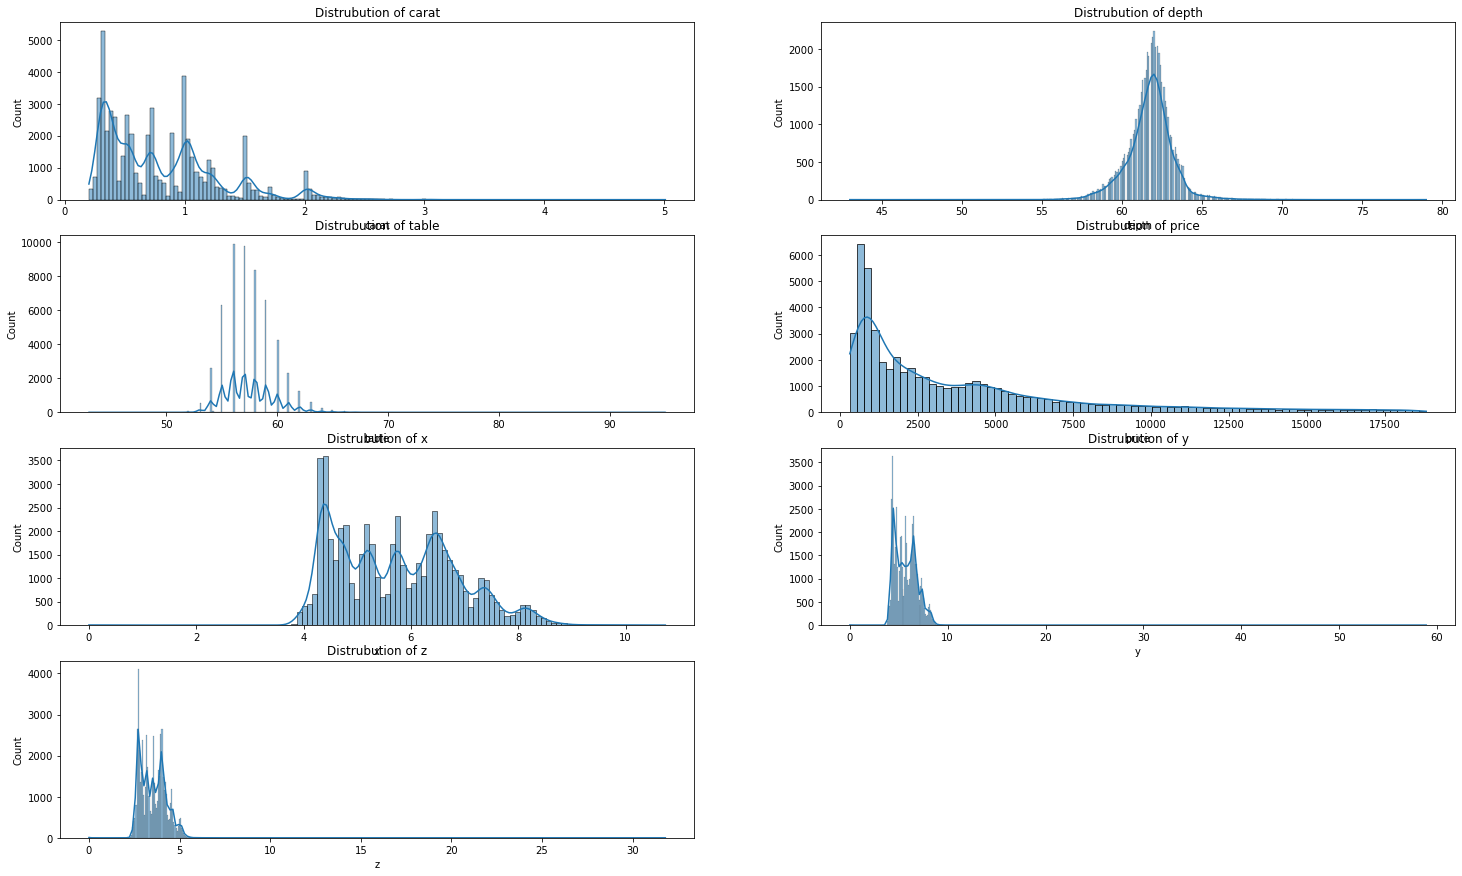

In [5]:
fig, axes = plt.subplots(ncols=2, nrows=4,figsize=(25, 15))
ax = axes.ravel()

for i, col in enumerate(diamond_numeric_cols):
    sns.histplot(diamond_data_main[col],kde=True,ax=ax[i])
    ax[i].set_title(f"Distrubution of {col}")

ax[-1].axis('off')
#ax[-2].axis('off')
plt.show()

From above distribution of the features:
- `carat` ,`x` and `price` has high variance and skewness 
- To reduce the skweness in the feature we can apply log transformation.
- `price` is the target variable so we will not do any tranformation on it.

Below are preprocessing can be done for high skewness:
- Log transformation
- Square Root Transform
- Box-Cox Transform

In [6]:
# doing log transformation to reduce the skweness
for col in ['carat','x']:
    diamond_data_main[col] = np.log1p(diamond_data_main[col])

### Question 4 : 
Construct and inspect the box plot of categorical features vs target variable. What do you find?


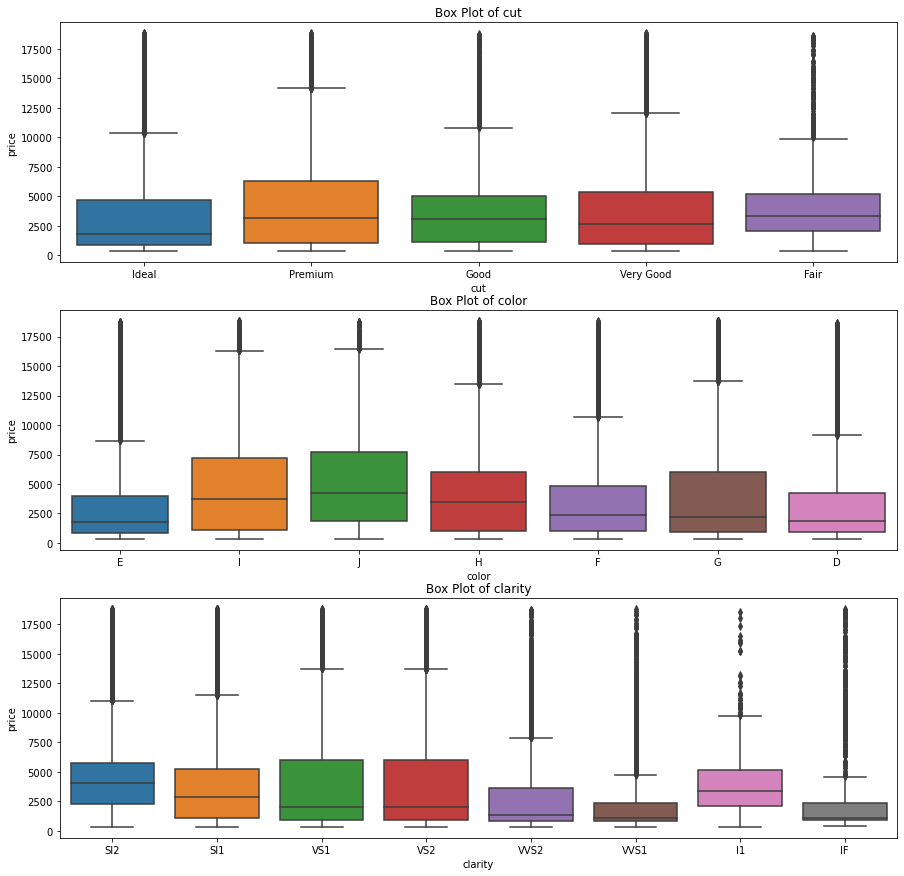

In [7]:
diamond_cat_cols = ['cut','color','clarity']
diamond_target = 'price'

fig,axs = plt.subplots(3,1,figsize=[15,15])
axs = axs.flat
for ax,col in zip(axs,diamond_cat_cols):
    sns.boxplot(x=diamond_data[col],y=diamond_data[diamond_target],ax=ax)
    ax.set_title(f'Box Plot of {col}')

### Question 5 : 

For the Diamonds dataset, plot the counts by color, cut and clarity

Text(0.5, 1.0, 'Count by color')

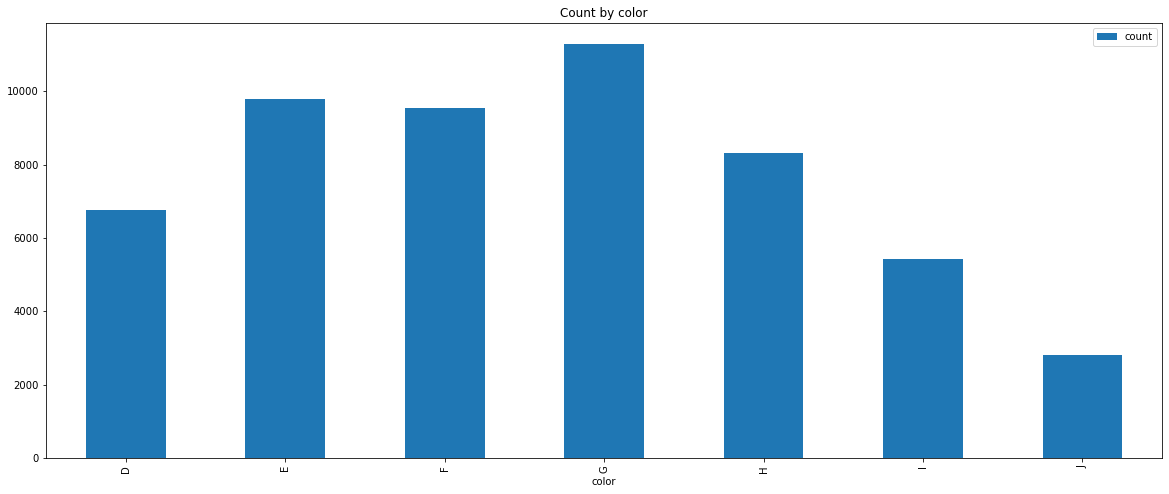

In [8]:
diamond_data.groupby(['color']).agg({'color':'count'}).rename(columns= {'color':'count'}).plot(kind='bar',figsize=(20,8))
plt.title('Count by color')

Text(0.5, 1.0, 'Count by cut')

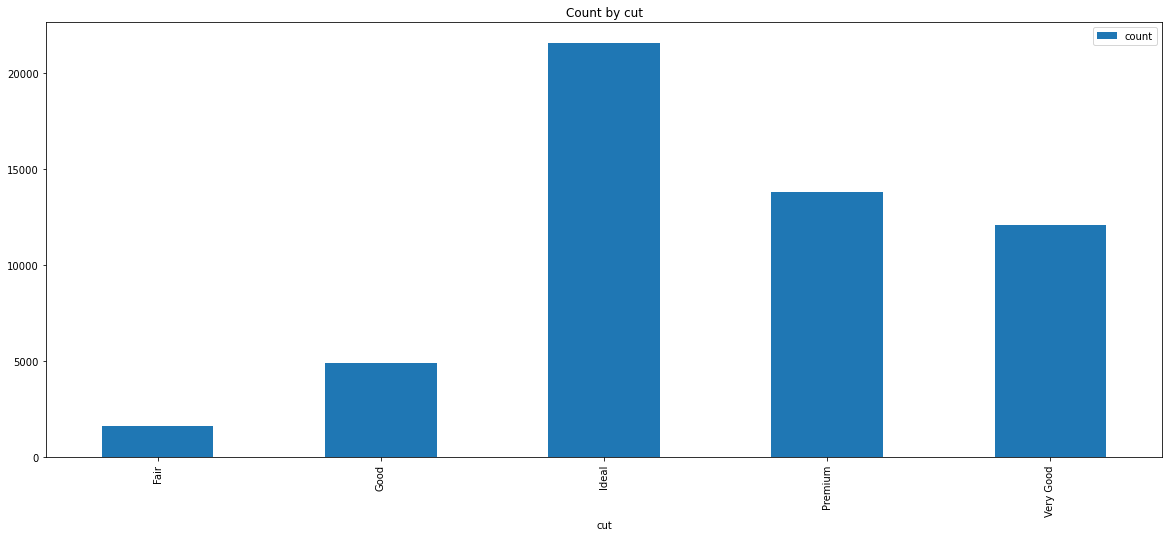

In [9]:
diamond_data.groupby(['cut']).agg({'cut':'count'}).rename(columns= {'cut':'count'}).plot(kind='bar',figsize=(20,8))
plt.title("Count by cut")

Text(0.5, 1.0, 'Count by clarity')

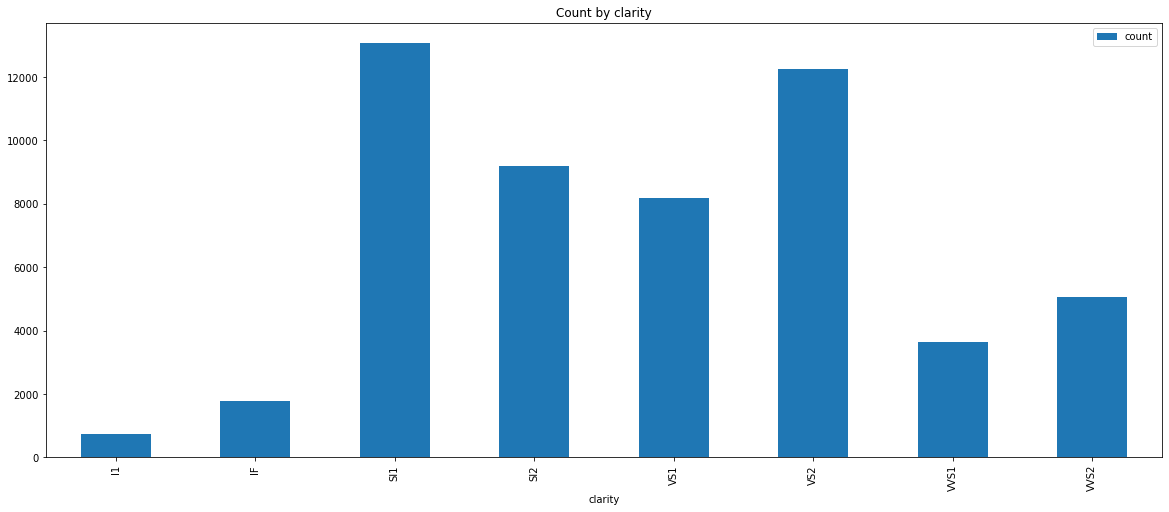

In [10]:
diamond_data.groupby(['clarity']).agg({'clarity':'count'}).rename(columns= {'clarity':'count'}).plot(kind='bar',figsize=(20,8))
plt.title('Count by clarity')

### Question 6 :

**Feature Selection :**

* `sklearn.feature selection..mutual_info_regression` function returns estimated mutual information between each feature and the label. Mutual information (MI) between two random variables is a non-negative value which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

* `sklearn.feature selection.f` regression function provides F scores, which is away of comparing the significance of the improvement of a model, with respect to the addition of new variables.

You may use these functions to select most important features. How does this step qualitatively affect the performance of your models in terms of test RMSE? Briefly describe your reasoning - exact results are not required but are appreciated.

*Mutual Information help to find the important feature for the target variable which help to machine learning model to give the better prediction. This step will improve the performance of the model. It will help to reduce the RMSE score. Below is the code to find the important feature for the target variable `price` for Diamond dataset.*

<AxesSubplot:>

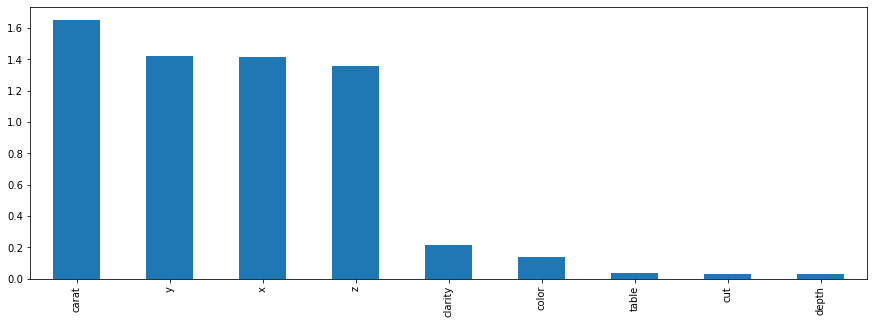

In [11]:
# One hot encoding on categorical features
cut_map = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':4}
color_map = {'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}
clarity_map = {'I1' : 1, 'SI2':2, 'SI1':3, 'VS2':4,'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

diamond_data['cut'] = diamond_data['cut'].map(cut_map)
diamond_data['color'] = diamond_data['color'].map(color_map)
diamond_data['clarity'] = diamond_data['clarity'].map(clarity_map)

diamond_data_main['cut'] = diamond_data_main['cut'].map(cut_map)
diamond_data_main['color'] = diamond_data_main['color'].map(color_map)
diamond_data_main['clarity'] = diamond_data_main['clarity'].map(clarity_map)

X,y = get_X_y()
from sklearn.feature_selection import mutual_info_regression as MIC
mi_score = MIC(X,y)
mutual_info = pd.Series(mi_score)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

*`carat` has come highly important feature for `price`*

### Training
Once the data is prepared, we would like to train multiple algorithms and compare their performance using average RMSE from 10-fold cross-validation 

**Linear Regression:**
What is the objective function? Train ordinary least squares (linear regression without regularization), as well as Lasso and Ridge regression, and compare their performances. Answer the following questions.


Objective function :

$h_{\theta}(x)=\theta_0 + \theta_1x_1 + .....+ \theta_nx_n$

Where<br>
$n=$ Number of features<br>
and $\theta_{0},\theta_{1},.....,\theta_{n} $ are the parameters

In [12]:
### Question 8 :
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV,LassoCV,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error

all_result_df = pd.DataFrame(columns = ['Model','R-Square','Train RMSE','Test RMSE','Scaling'])
# define evalution model 
def model_evalution(model,name,xtrain,ytrain,xtest,ytest,scaling='No'):
    ypred = model.predict(xtrain)
    r2_train = r2_score(ytrain,ypred)
    rmse_train = mean_squared_error(ytrain,ypred)

    ypred = model.predict(xtest)
    r2_test = r2_score(ytest,ypred)
    rmse_test = mean_squared_error(ytest,ypred)

    #print(f"Train R2 : {r2_train} | Test R2 : {r2_test} | RMSE : {round(mean_squared_error(ytest,ypred))}")
    return [name,r2_train,round(rmse_train),round(rmse_test),scaling]


# split dataset into train and test with 30% test data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# train ols model
x_train_ols = sm.add_constant(x_train)
x_test_ols = sm.add_constant(x_test)
model = sm.OLS(y_train, x_train_ols)
lin_model = model.fit()
#y_pred = lin_model.predict(x_test_ols)
all_result_df.loc[len(all_result_df)] = model_evalution(lin_model,'OLS',x_train_ols,y_train,x_test_ols,y_test)
#print(f'Model : OLS | Train R-Square : {lin_model.rsquared} | Test R-Square : {r2_score(y_test,y_pred)} | Test RMSE : {round(mean_squared_error(y_test,y_pred))}')


#define best regularization level using RidgeCV and LassoCV
alphas = np.exp(np.arange(-10,10,1))
ridgecv = RidgeCV(alphas = alphas,cv=10)
lassocv = LassoCV(alphas = alphas,cv=10)
ridgecv.fit(x_train, y_train)
lassocv.fit(x_train, y_train)

all_result_df.loc[len(all_result_df)] = model_evalution(lassocv,'Lasso',x_train,y_train,x_test,y_test)
all_result_df.loc[len(all_result_df)] = model_evalution(ridgecv,'Ridge',x_train,y_train,x_test,y_test)

# train lasso model

#y_pred = lassocv.predict(x_test)
#print(f'Model : Lasso | Train R-Square : {lassocv.score(x_train,y_train,)} | Test R-Square : {lassocv.score(x_test,y_test)} | Test RMSE : {round(mean_squared_error(y_test,y_pred))} | Penalty Parameter : {lassocv.alpha_}')

# train ridge model

#y_pred = ridgecv.predict(x_test)
#print(f'Model : Ridge | Train R-Square : {ridgecv.score(x_train,y_train)} | Test R-Square : {ridgecv.score(x_test,y_test)} | Test RMSE : {round(mean_squared_error(y_test,y_pred))} | Penalty Parameter : {ridgecv.alpha_}')

all_result_df


,Model,R-Square,Train RMSE,Test RMSE,Scaling
0,OLS,0.891753,1737492,1764071,No
1,Lasso,0.891593,1740049,1758715,No
2,Ridge,0.891753,1737492,1764071,No


### Question 7 : 
**Explain how each regularization scheme affects the learned hypotheses.**
 
Regularization is a technique used to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting. This method keeps all the features but reduces the magnitudes of the hypothesis parameters. This method works well when all the parameters contribute to the prediction of a label. The commonly used regularization techniques are : 

1. **L1 regularization:** Lasso is the L1 regularization. It helps to reduce the parameter to zero the features associated with those parameters won't have any effect on the cost function.
2. **L2 regularization:** Ridge is the L2 regualrization. It is used in cases where the size of training examples is less, thus preventing the model from overfitting the training data by reducing the variance.


We can see the above model result of OLS, Lasso and Ridge, where Ridge & Lasso help to reduce the overfittng from the model.

### Question 8:

Report your choice of the best regularization scheme along with the optimal penalty parameter and briefly explain how it can be computed.

- Ridge is the best regularization scheme choice, As it reduces the model complexity by coefficient shrinkage. It shrinks the parameters. Therefore, it is used to prevent multicollinearity. The Cost function of ridge regression: <br>

$J(\theta) = \frac{1}{2m} [\sum_{i=1}^{m}(h_{\theta}(x^{[i]}-y^{[i]})^2+ \lambda \sum_{i=1}^{n}\theta_{j}^{2}]$

Lambda is the penalty term. $λ$ given here is denoted by an alpha parameter in the ridge function. So, by changing the values of alpha, we are controlling the penalty term. The higher the values of alpha, the bigger is the penalty and therefore the magnitude of coefficients is reduced. Below code explain that how R-square value goes with respect to alpha ($\lambda$)

<AxesSubplot:xlabel='alpha'>

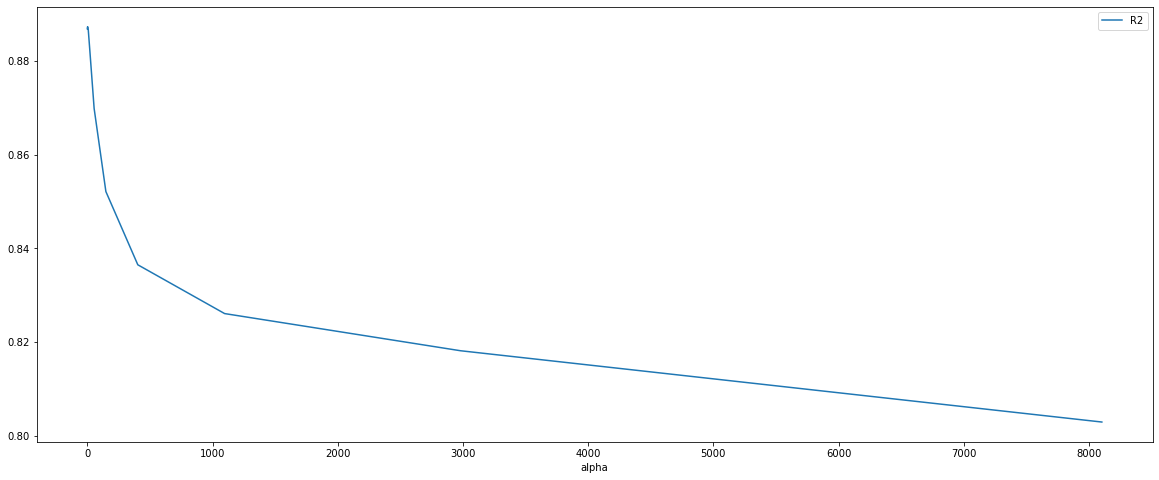

In [13]:
ridge_model_result = pd.DataFrame(columns=['alpha','R2'])
alphas = np.exp(np.arange(-10,10,1))
for alpha in alphas:
    rigde_reg = Ridge(alpha=alpha)
    rigde_reg.fit(x_train,y_train)
    y_pred = rigde_reg.predict(x_test)
    r_square = r2_score(y_test,y_pred)
    ridge_model_result.loc[len(ridge_model_result)] = [alpha,r_square]

ridge_model_result.plot(x='alpha',y='R2',kind='line',figsize=(20,8))

### Question 9:

Does feature scaling play any role (in the cases with and without regularization)? Justify your answer.

No, feaure scaling play a very good role to imporve the model performance in our case to predict the data. As shown the below result, there are better R2 and RMSE score of the OLS & regularization models without scaling feature compare to with scaling.

In [14]:
#diamond_data_scaling = standardization(diamond_data_main,['depth', 'table', 'y', 'z'])


X,y = get_X_y()
X = standardization(X,['depth', 'table', 'y', 'z'])

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# OLS Model
x_train_ols = sm.add_constant(x_train)
x_test_ols = sm.add_constant(x_test)
model = sm.OLS(y_train, x_train_ols)
lin_model = model.fit()
all_result_df.loc[len(all_result_df)] = model_evalution(lin_model,'OLS',x_train_ols,y_train,x_test_ols,y_test,'Yes')

lassocv = LassoCV(cv=10)
lassocv.fit(x_train, y_train)


ridgecv = RidgeCV(cv=10)
ridgecv.fit(x_train, y_train)
all_result_df.loc[len(all_result_df)] = model_evalution(lassocv,'Lasso',x_train,y_train,x_test,y_test,'Yes')
all_result_df.loc[len(all_result_df)] = model_evalution(ridgecv,'Ridge',x_train,y_train,x_test,y_test,'Yes')


all_result_df

,Model,R-Square,Train RMSE,Test RMSE,Scaling
0,OLS,0.891753,1737492,1764071,No
1,Lasso,0.891593,1740049,1758715,No
2,Ridge,0.891753,1737492,1764071,No
3,OLS,0.890623,1755630,1777463,Yes
4,Lasso,0.889581,1772353,1784548,Yes
5,Ridge,0.890164,1762996,1779838,Yes


### Question 10:

**Some linear regression packages return p-values for different features. What is the meaning of them and how can you infer the most significant features?**

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that we can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

In the output below, we can see that the predictor variables of `carat, color, clarity, depth, table, x, y, z, cut` are significant because of their p-values are 0.000.
Regression coefficients represent the mean change in the response variable for one unit of change in the predictor variable while holding other predictors in the model constant. This statistical control that regression provides is important because it isolates the role of one variable from all of the others in the model.

In the output below, we can see that variable `x` is having the hight coefficient value (8.54) among all significant variables, It means, `x` is the most significant features among all.

In [15]:
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                 3.415e+04
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        16:01:58   Log-Likelihood:            -3.2502e+05
No. Observations:               37758   AIC:                         6.501e+05
Df Residuals:                   37748   BIC:                         6.502e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.946e+04   1.03e+04     -2.871      0.004   -4.96e+04   -9346.754
carat       2.617e+04    164.907    158.666      0.000    2.58e+04    2.65e+04
cut          278.2044     10.180     27.330      0.000     258.252     298.157
color        305.9146      4.240     72.152      0.000     297.604     314.225
clarity      519.7592      4.559    114.000      0.000     510.823     528.696
depth       3.112e+04   7468.794      4.167      0.000    1.65e+04    4.58e+04
table       3.397e+04   7182.798      4.729      0.000    1.99e+04     4.8e+04
x          -1.867e+04    277.563    -67.250      0.000   -1.92e+04   -1.81e+04
y           4.485e+04   3850.636     11.648      0.000    3.73e+04    5.24e+04
z           2.333e+04   3844.645      6.069      0.000    1.58e+04    3.09e+04
==============================================================================
Omnibus:                    18492.617   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4941708.213
Skew:                          -1.169   Prob(JB):                         0.00
Kurtosis:                      58.997   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Polynomial Regression:

Perform polynomial regression by crafting products of raw features up to a certain degree and applying linear regression on the compound features. You can use scikit-learn library to build such features. Avoid overfitting by proper regularization. 

--------------------------------------------------------------------------------
Find the best-scoring degree for OLS model
--------------------------------------------------------------------------------
Degree : 3 | Train R-Square : 0.9160836725083862 | Test R-Square : 0.9159111262229245 | RMSE : 1311438.7695594865
Degree : 6 | Train R-Square : 0.9196308544331406 | Test R-Square : 0.9186999495758601 | RMSE : 1267944.6555083403
Degree : 9 | Train R-Square : 0.9203694579015658 | Test R-Square : 0.9189095441903404 | RMSE : 1264675.8460811954
Degree : 12 | Train R-Square : 0.9207294677694897 | Test R-Square : 0.9177463177517143 | RMSE : 1282817.3692205716
Degree : 15 | Train R-Square : 0.9208906829090435 | Test R-Square : 0.9190676650509146 | RMSE : 1262209.8143992533
Degree : 18 | Train R-Square : 0.9208480946198778 | Test R-Square : 0.9197271626265855 | RMSE : 1251924.3788794712



--------------------------------------------------------------------------------
Find the best-scoring de

Text(0.5, 1.0, 'Distribution of RMSE over alpha at Degree level')

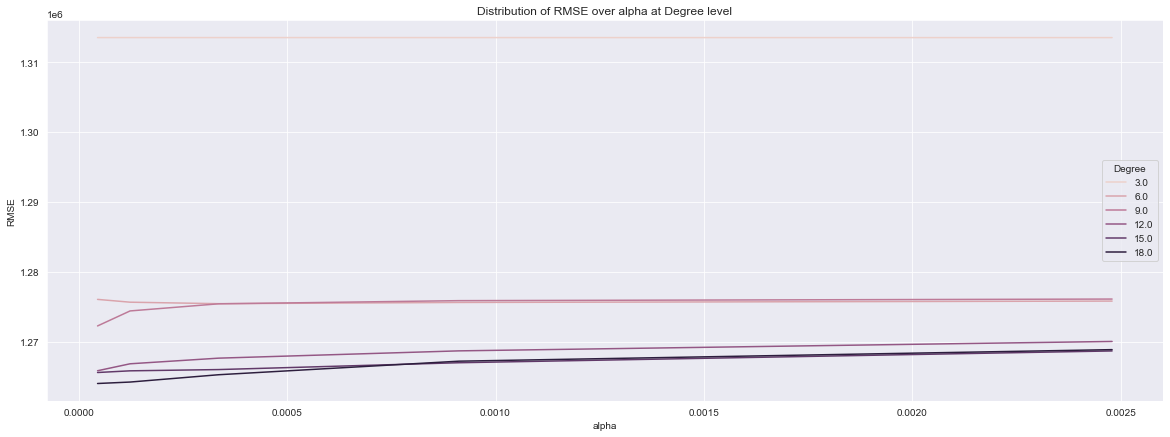

In [16]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

def add_poly_features(dataset, degree, columns):
    """
    :param dataset: Your data
    :param degree: Max degree
    :return: Augmented DataFrame
    """
    poly_tran = PolynomialFeatures(degree=degree,include_bias=False)
    poly_dataset = poly_tran.fit_transform(dataset[columns])
    poly_dataset = pd.DataFrame(poly_dataset,columns=poly_tran.get_feature_names(dataset[columns].columns))
    
    # Remove the interaction features 
    req_col = [col+'^'+str(i) for col in columns for i in range(2,degree+1)]
    #poly_dataset = poly_dataset.loc[:len(dataset)]
    dataset = dataset.reset_index(drop=True)
    poly_dataset = poly_dataset.reset_index(drop=True)
    poly_dataset = pd.concat([dataset,poly_dataset[req_col]],axis=1,ignore_index=True)
    return poly_dataset

def build_interaction(df, interact_left, interact_right):
    
    interact_left,interact_right = list(interact_left),list(interact_right)
    cols = interact_left + interact_right
    poly_tran = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
    poly_dataset = poly_tran.fit_transform(df[cols])
    poly_dataset = pd.DataFrame(poly_dataset,columns=poly_tran.get_feature_names(cols))
    
    req_col = [l+' '+r for l in interact_left for r in interact_right]
    poly_dataset = pd.concat([df,poly_dataset[req_col]],axis=1)
    result_df = poly_dataset.copy()
    return result_df

def split_columns(df, target_col, drop_columns):
    
    X_train = df.drop(columns=drop_columns,axis=1,errors='ignore')
    y_train = df[target_col]
    return X_train, y_train

def scale_datasets(train_data, test_data, cols_to_scale):
    train,test = train_data.copy(),test_data.copy()
    scale = StandardScaler()
    train[cols_to_scale] = scale.fit_transform(train[cols_to_scale])
    test[cols_to_scale] = scale.transform(test[cols_to_scale])
    return train, test

def get_design_mats(train_df, val_df,  degree, 
                    columns_forpoly,
                    target_col='price', 
                    bad_columns=['price']):
    
    # 1. split the data with features and target
    x_train,y_train = split_columns(train_df, target_col, bad_columns)
    x_val,y_val = split_columns(val_df, target_col, bad_columns)
    
    dataset_col = list(x_train.columns)
    
    #2. standardize
    #x_train,x_val = scale_datasets(x_train, x_val, columns_forpoly)
    
    #3. add polynomial features 
    x_train = add_poly_features(x_train, degree, columns_forpoly)
    x_val = add_poly_features(x_val, degree, columns_forpoly)
    #4. build interaction
    #interact_left = columns_forpoly
    #interact_right = list(set(dataset_col)-set(interact_left))
    
    #x_train = build_interaction(x_train, interact_left, interact_right)
    #x_val = build_interaction(x_val, interact_left, interact_right)
    
    return x_train,y_train, x_val,y_val



print('-'*80)
print('Find the best-scoring degree for OLS model')
print('-'*80)
X,y = get_X_y()
X['price'] = y
x_train,x_test = train_test_split(X,test_size=0.30,random_state=42)

degrees = [3,6,9,12,15,18]
for degree in degrees:
    x_train_poly,y_train,x_test_poly,y_test = get_design_mats(x_train, x_test,  degree,['carat','x'])
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    x_train2 = sm.add_constant(x_train_poly)
    x_test2 = sm.add_constant(x_test_poly)
    model = sm.OLS(y_train, x_train2)
    lin_model = model.fit()
    y_pred = lin_model.predict(x_test2)
    
    print(f'Degree : {degree} | Train R-Square : {lin_model.rsquared} | Test R-Square : {r2_score(y_test,y_pred)} | RMSE : {mean_squared_error(y_test,y_pred)}')
    #print(list(x_train.columns)[5:])
print('\n\n')
print('-'*80)
print('Find the best-scoring degree and regularization combination for Ridge model')
print('-'*80)

degrees = [3,6,9,12,15,18]

best_ridge_result = pd.DataFrame(columns=['Degree','alpha','RMSE'])
for degree in degrees:
    for alpha in alphas[:5]:
        x_train_poly,y_train,x_test_poly,y_test = get_design_mats(x_train, x_test,  degree,['carat'])
        y_train = y_train.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        rigde_reg = Ridge(alpha=alpha)
        rigde_reg.fit(x_train_poly,y_train)
        y_pred = rigde_reg.predict(x_test_poly)
        r_square = r2_score(y_test,y_pred)
        rmse = mean_squared_error(y_test,y_pred)
        best_ridge_result.loc[len(best_ridge_result)] = [degree,alpha,rmse]

sns.set_style('darkgrid')
palette = dict(zip(degrees, sns.color_palette(n_colors=len(degrees))))
fig,ax = plt.subplots(figsize=(20,7))
sns.lineplot(x='alpha', y='RMSE', hue='Degree',  data=best_ridge_result)
plt.title('Distribution of RMSE over alpha at Degree level')

### Question 11:

**Look up for the most salient features and interpret them.**


In [17]:
x_train_poly,y_train,x_test_poly,y_test = get_design_mats(x_train, x_test,  18,['carat','x'])
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
x_train2 = sm.add_constant(x_train_poly)
x_test2 = sm.add_constant(x_test_poly)
model = sm.OLS(y_train, x_train2)
lin_model = model.fit()

all_result_df.loc[len(all_result_df)] = model_evalution(lin_model,'OLS Poly Degree=18',x_train2,y_train,x_test2,y_test,'No')

lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        16:06:11   Log-Likelihood:            -3.1892e+05
No. Observations:               37758   AIC:                         6.379e+05
Df Residuals:                   37725   BIC:                         6.382e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.268e+05   1.45e+05      1.564      0.118   -5.75e+04    5.11e+05
0           -5.08e+06   3.11e+06     -1.635      0.102   -1.12e+07    1.01e+06
1            146.9319      8.674     16.940      0.000     129.931     163.933
2            333.6494      3.641     91.634      0.000     326.513     340.786
3            488.9526      3.941    124.064      0.000     481.228     496.677
4            -55.9615      8.010     -6.986      0.000     -71.662     -40.261
5            -35.5822      3.149    -11.301      0.000     -41.754     -29.411
6           7.466e+09   1.06e+09      7.015      0.000    5.38e+09    9.55e+09
7             21.3434     21.845      0.977      0.329     -21.473      64.159
8             55.8915     34.414      1.624      0.104     -11.560     123.343
9           4.931e+07   2.88e+07      1.714      0.087   -7.08e+06    1.06e+08
10         -2.752e+08   1.51e+08     -1.826      0.068   -5.71e+08    2.01e+07
11          9.756e+08   4.88e+08      1.998      0.046    1.86e+07    1.93e+09
12         -2.244e+09    9.9e+08     -2.266      0.023   -4.18e+09   -3.03e+08
13          3.188e+09   1.15e+09      2.765      0.006    9.28e+08    5.45e+09
14         -2.174e+09   4.35e+08     -4.998      0.000   -3.03e+09   -1.32e+09
15         -6.997e+08   7.23e+08     -0.968      0.333   -2.12e+09    7.17e+08
16          2.328e+09   8.66e+08      2.688      0.007     6.3e+08    4.03e+09
17         -6.008e+08   2.46e+08     -2.438      0.015   -1.08e+09   -1.18e+08
18          -1.83e+09   9.76e+08     -1.875      0.061   -3.74e+09    8.26e+07
19          1.425e+09   3.35e+08      4.246      0.000    7.67e+08    2.08e+09
20           9.33e+08   7.92e+08      1.178      0.239    -6.2e+08    2.49e+09
21         -2.149e+09   1.12e+09     -1.915      0.056   -4.35e+09     5.1e+07
22          1.572e+09   7.14e+08      2.202      0.028    1.73e+08    2.97e+09
23         -6.094e+08   2.56e+08     -2.379      0.017   -1.11e+09   -1.07e+08
24          1.262e+08   5.04e+07      2.503      0.012    2.74e+07    2.25e+08
25         -1.106e+07   4.26e+06     -2.594      0.009   -1.94e+07    -2.7e+06
26         -1.118e+10   1.61e+09     -6.949      0.000   -1.43e+10   -8.03e+09
27         -3.995e+09   5.61e+08     -7.122      0.000   -5.09e+09    -2.9e+09
28          7.022e+09   1.02e+09      6.867      0.000    5.02e+09    9.03e+09
29          7.466e+09   1.07e+09      6.998      0.000    5.37e+09    9.56e+09
30         -1.832e+09   2.88e+08     -6.370      0.000    -2.4e+09   -1.27e+09
31          -8.31e+09    1.2e+09     -6.904      0.000   -1.07e+10   -5.95e+09
32         -2.737e+09    3.8e+08     -7.200      0.000   -3.48e+09   -1.99e+09
33          7.252e+09   1.06e+09      6.822      0.000    5.17e+09    9.34e+09
34          4.942e+09   7.03e+08      7.028      0.000    3.56e+09    6.32e+09
35

In [18]:
all_result_df

,Model,R-Square,Train RMSE,Test RMSE,Scaling
0,OLS,0.891753,1737492,1764071,No
1,Lasso,0.891593,1740049,1758715,No
2,Ridge,0.891753,1737492,1764071,No
3,OLS,0.890623,1755630,1777463,Yes
4,Lasso,0.889581,1772353,1784548,Yes
5,Ridge,0.890164,1762996,1779838,Yes
6,OLS Poly Degree=18,0.920848,1270476,1251924,No


### Question 12:

**What degree of polynomial is best? What does a very high-order polynomial imply about the fit on the training data? How do you choose this parameter?**

As we can see above output, for OLS degree = 18 is best and for Ridge degree = 18 looks best. The degree of a polynomial determines the most number of solutions that function could have and the most number often times a function will cross the features. As a result, sometimes the degree can be 0, which means the regression function does not have any solutions or any instances of the graph crossing the features. It means high-order polynomial could have more solutions for the model. We can find the best degree paramter using calculating the RMSE score for all selected order degrees and check which one is the best order degree with respect to RMSE score. 

### Question 13:

**For the diamond dataset it might make sense to craft new features such as z = x1 × x2, etc. Explain why this might make sense and check if doing so will boost accuracy.**

For diamond dataset, `carat` & `x` feaure has make sense to craft new features becasue it has been boosted up the accuracy of the both OLS and Ridge model as we can see the above result of the models.

### Neural Network

Try a multi-layer perceptron (fully connected neural network). You can simply use sklearn implementation and compare the performance

In [19]:
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(150,100,50),  (100,50,30)],
    'max_iter': [50],
    'activation': ['relu','tanh'],
    'solver': ['sgd','adam'],
    'alpha': [0.0001, 0.05]
}
X,y = get_X_y()
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

mlp_reg = MLPRegressor()
grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=3)
grid.fit(x_train, y_train)

print(grid.best_params_) 

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 50, 'solver': 'adam'}


In [20]:
y_pred = grid.predict(x_train)
r2_train = r2_score(y_train,y_pred)

y_pred = grid.predict(x_test)
r2_test = r2_score(y_test,y_pred)
print(f'Model : MLP | Train R-Square : {r2_train} | Test R-Square : {r2_test} | Test RMSE : {round(mean_squared_error(y_test,y_pred))}')

all_result_df.loc[len(all_result_df)] = model_evalution(grid,'Neural Network (MLP)',x_train,y_train,x_test,y_test,'No')
all_result_df

Model : MLP | Train R-Square : 0.9649007504105584 | Test R-Square : 0.9667431799155374 | Test RMSE : 518669


,Model,R-Square,Train RMSE,Test RMSE,Scaling
0,OLS,0.891753,1737492,1764071,No
1,Lasso,0.891593,1740049,1758715,No
2,Ridge,0.891753,1737492,1764071,No
3,OLS,0.890623,1755630,1777463,Yes
4,Lasso,0.889581,1772353,1784548,Yes
5,Ridge,0.890164,1762996,1779838,Yes
6,OLS Poly Degree=18,0.920848,1270476,1251924,No
7,Neural Network (MLP),0.964901,563382,518669,No


### Question 14:

Why does it do much better than linear regression?

MLP is better peform than linear regression in most of the cases, because :
1. There are few assumptions in linear regression which is very difficult to full-fill all in the dataset.
2. MLP works better for large volume of dataset.

### Question 15:

Adjust your network size (number of hidden neurons and depth), and weight decay as regularization. Find a good hyper-parameter set systematically.

- From the above hyper tune parameter using grid search cross validation method, we found the good hyper-parameter. Below is the best parameter result

In [21]:
print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 50, 'solver': 'adam'}


### Question 16:

What activation function should be used for the output? You may use none.

- we have regression prediction as we need to predict the `price`, so for regression problem, we used the linear activation function (Relu).

### Question 17:
What is the risk of increasing the depth of the network too far?

- Increasing the depth of a neural network will  approximate functions with increased non-linearity.
- At the same time, this comes with a cost of increasing the chance of overfitting. We may have to work with regularizing the network better and get more training data.
- Also, increasing the depth means model is more complex and the optimization function may not be able to find the optimal set of weights.
- Increasing depth may also add to the execution time.

### Random Foreset:

Apply a random forest regression model on datasets, and answer the following.

- Random forests have the following hyper-parameters:
    - Maximum number of features;
    - Number of trees;
    - Depth of each tree;

### Question 18:

Fine-tune your model. Explain how these hyper-parameters affect the overall performance? Do some of them have regularization effect?

In [22]:
from sklearn.ensemble import RandomForestRegressor


X,y = get_X_y()
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

rf = RandomForestRegressor(random_state = 42)

rf.fit(x_train,y_train)

all_result_df.loc[len(all_result_df)] = model_evalution(rf,'Random Forest',x_train,y_train,x_test,y_test,'No')

param_grid = {
    'n_estimators': [20,50,100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [8,17,28,35]
    }

rf_grid = GridSearchCV(rf, param_grid, n_jobs= -1, cv=3)
rf_grid.fit(x_train, y_train)

all_result_df.loc[len(all_result_df)] = model_evalution(rf_grid,'Random Forest fine tune',x_train,y_train,x_test,y_test,'No')

all_result_df

,Model,R-Square,Train RMSE,Test RMSE,Scaling
0,OLS,0.891753,1737492,1764071,No
1,Lasso,0.891593,1740049,1758715,No
2,Ridge,0.891753,1737492,1764071,No
3,OLS,0.890623,1755630,1777463,Yes
4,Lasso,0.889581,1772353,1784548,Yes
5,Ridge,0.890164,1762996,1779838,Yes
6,OLS Poly Degree=18,0.920848,1270476,1251924,No
7,Neural Network (MLP),0.964901,563382,518669,No
8,Random Forest,0.997322,42982,293167,No
9,Random Forest fine tune,0.996377,58158,291309,No


### Question 19:

Why does random forest perform well?

- Random forest is the ensemble bagging technique, where it produces the sub decision trees and combine those tress result for prediciton. This model is really powerful since it creates sub decision trees on random sub feaures which help to improve the model peformance.

### Question 20:

Randomly pick a tree in your random forest model (with maximum depth of 4) and plot its structure. Which feature is selected for branching at the root node? What can you infer about the importance of features? Do the important features match what you got in part 3.2.1?

*From the below result, `carat` feature is at root node for selected branching tree.*

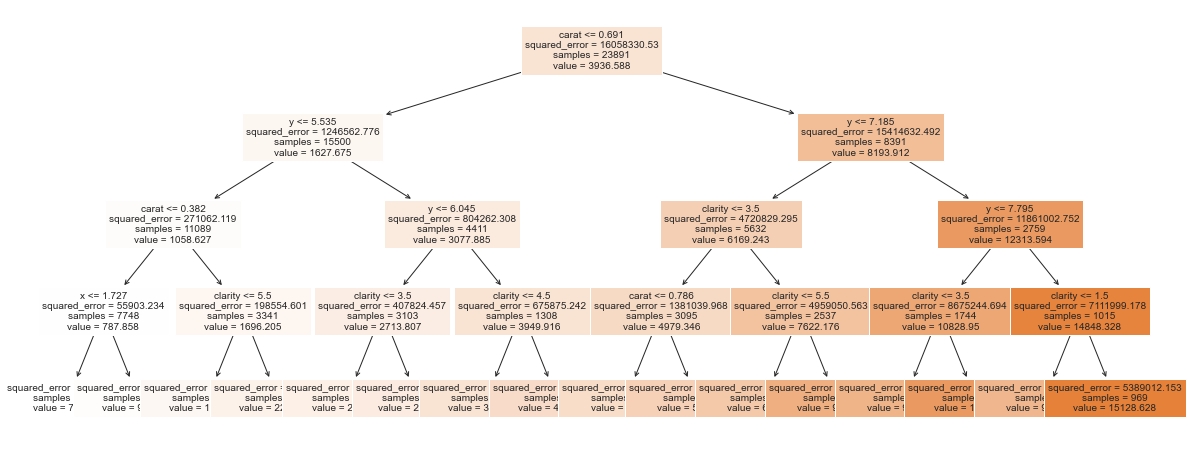

In [23]:
from sklearn.tree import export_graphviz
from sklearn import tree
model = RandomForestRegressor(n_estimators=10,max_depth=4)
# Train
model.fit(x_train, y_train)



plt.figure(figsize=(20,8))
_ = tree.plot_tree(model.estimators_[5], feature_names=x_train.columns, filled=True,fontsize=10)

<BarContainer object of 9 artists>

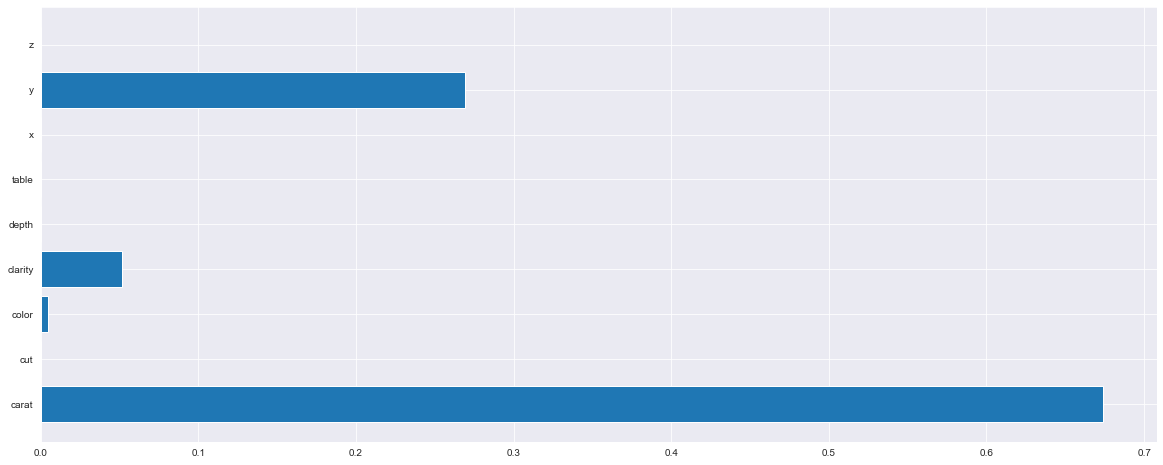

In [24]:
# find the important features
plt.figure(figsize=(20,8))
plt.barh(x_train.columns, model.feature_importances_)

*Yes important features are matched what we got from part 3.2.1*

* `carat`, `y` & `clarity` has come important features for the model.

### Question 21:

Read the documentation of LightGBM and CatBoost and experiment on the picked dataset to determine the important hyperparameters along with a proper search space for the tuning of these parameters.

In [26]:
import lightgbm as lgb

# Skopt functions



param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'learning_rate':[0.001,0.01]
    }

lgb_estimator = lgb.LGBMRegressor(boosting_type='gbdt',  objective='regression', num_boost_round=2000, metric='rmse',verbose=-1)
lgb_gird = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=3)
lgb_gird = lgb_gird.fit(X=x_train, y=y_train)

print(lgb_gird.best_params_, lgb_gird.best_score_)


[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num

In [26]:
all_result_df.loc[len(all_result_df)] = model_evalution(lgb_gird,'LightGBM fine tune',x_train,y_train,x_test,y_test,'No')

all_result_df

,Model,R-Square,Train RMSE,Test RMSE,Scaling
0,OLS,0.891753,1737492,1764071,No
1,Lasso,0.891593,1740049,1758715,No
2,Ridge,0.891753,1737492,1764071,No
3,OLS,0.890623,1755630,1777463,Yes
4,Lasso,0.889581,1772353,1784548,Yes
5,Ridge,0.890164,1762996,1779838,Yes
6,OLS Poly Degree=18,0.921323,1262853,1245408,No
7,Neural Network (MLP),0.973068,432281,413258,No
8,Random Forest,0.997253,44091,295290,No
9,Random Forest fine tune,0.996351,58566,293499,No


In [27]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor(verbose=False)
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]
              }

cbr_grid = GridSearchCV(estimator=cbr, param_grid = parameters, cv = 3, n_jobs=-1)
cbr_grid.fit(x_train, y_train)
print(lgb_gird.best_params_, lgb_gird.best_score_)

{'learning_rate': 0.01, 'num_leaves': 31, 'reg_alpha': 0.1} 0.9811743782055465


In [28]:
all_result_df.loc[len(all_result_df)] = model_evalution(cbr_grid,'CatBoost fine tune',x_train,y_train,x_test,y_test,'No')

all_result_df

,Model,R-Square,Train RMSE,Test RMSE,Scaling
0,OLS,0.891753,1737492,1764071,No
1,Lasso,0.891593,1740049,1758715,No
2,Ridge,0.891753,1737492,1764071,No
3,OLS,0.890623,1755630,1777463,Yes
4,Lasso,0.889581,1772353,1784548,Yes
5,Ridge,0.890164,1762996,1779838,Yes
6,OLS Poly Degree=18,0.920848,1270476,1251924,No
7,Neural Network (MLP),0.964901,563382,518669,No
8,Random Forest,0.997322,42982,293167,No
9,Random Forest fine tune,0.996377,58158,291309,No


### Question 22:

Apply Bayesian optimization using skopt.BayesSearchCV from scikit-optmize to search good hyperparameter combinations in your search space. Report the best hyperparameter found and the corresponding RMSE, for both algorithms.

In [50]:
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import make_scorer
from functools import partial
# Setting the scoring function
scoring = make_scorer(partial(mean_squared_error, squared=False), 
                      greater_is_better=False)
def report_perf(optimizer, X, y, title="model", callbacks=None):
    
    if callbacks is not None:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
        
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
     
    return best_params

def bayes_optimization(search_spaces,model,X,y):
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.30,random_state=42)
    
    # Running the optimizer
    overdone_control = DeltaYStopper(delta=0.01)               # We stop if the gain of the optimization becomes too small
    time_limit_control = DeadlineStopper(total_time=60*20) # We impose a time limit (6 hours)

    if model == 'lgb':
        reg = lgb.LGBMRegressor(boosting_type='dart',
                        objective='regression',
                        metric='rmse',
                        n_jobs=1, 
                        verbose=-1,
                        random_state=0)
        
        opt = BayesSearchCV(estimator=reg,                                    
                    search_spaces=search_spaces,                      
                    scoring=scoring,                           
                    cv=3,                                           
                    n_iter=3,                                        # max number of trials
                    n_points=3,                                       # number of hyperparameter sets evaluated at the same time
                    n_jobs=-1,                                        # number of jobs
                    iid=False,                                        # if not iid it optimizes on the cv score
                    return_train_score=False,                         
                    refit=False,                                      
                    optimizer_kwargs={'base_estimator': 'GP'},        # optmizer parameters: we use Gaussian Process (GP)
                    random_state=0)

        best_params = report_perf(opt, X, y,'LightGBM_regression', 
                            callbacks=[overdone_control, time_limit_control])
        # Transferring the best parameters to our basic regressor
        print("Lgb Model best_params : ",best_params)
        reg = lgb.LGBMRegressor(boosting_type='dart',
                                objective='regression',
                                metric='rmse',
                                n_jobs=1, 
                                verbose=-1,
                                random_state=0,
                                **best_params)
            
        reg.fit(x_train, y_train)
        
        all_result_df.loc[len(all_result_df)] = model_evalution(reg,'LightGBM Bayesian',x_train,y_train,x_test,y_test,'No')
        
        

    else:
        reg = CatBoostRegressor(verbose = False)
        #x_train[diamond_cat_cols] = x_test[diamond_cat_cols].astype('int').astype('category')
        #x_test[diamond_cat_cols] = x_test[diamond_cat_cols].astype('int').astype('category')
        opt = BayesSearchCV(estimator=reg,                                    
                search_spaces=search_spaces,                      
                scoring=scoring,                           
                cv=3,                                          
                n_iter=3,                                        # max number of trials
                n_points=3,                                       # number of hyperparameter sets evaluated at the same time
                n_jobs=-1,                                        # number of jobs
                iid=False,                                        # if not iid it optimizes on the cv score
                return_train_score=False,                         
                refit=False,                                      
                optimizer_kwargs={'base_estimator': 'GP'},        # optmizer parameters: we use Gaussian Process (GP)
                random_state=0)
        best_params = report_perf(opt, X, y,'CatBoost_regression', 
                            callbacks=[overdone_control, time_limit_control])

        print("CatBoost Model best_params : ",best_params)
        reg = CatBoostRegressor(verbose = False,**best_params)
        reg.fit(x_train, y_train)
        all_result_df.loc[len(all_result_df)] = model_evalution(reg,'Catboost Bayesian',x_train,y_train,x_test,y_test,'No')
    return reg,x_train,x_test,y_train,y_test

lgb_search_spaces = {
'learning_rate': Real(0.01, 1.0, 'log-uniform'),     # Boosting learning rate
'n_estimators': Integer(30, 1000),                   # Number of boosted trees to fit
'num_leaves': Integer(2, 20),                       # Maximum tree leaves for base learners
'max_depth': Integer(-1, 20),                       # Maximum tree depth for base learners, <=0 means no limit


'reg_lambda': Real(1e-9, 20, 'log-uniform'),      # L2 regularization
'reg_alpha': Real(1e-9, 20, 'log-uniform'),       # L1 regularization
}

cat_search_spaces = {
    'loss_function': ['RMSE'],
    'iterations': Integer(10, 1000),
    'depth': Integer(1, 12),
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    
    
    'l2_leaf_reg': Integer(2, 10), # L2 regularization
   }


X,y = get_X_y()


lgb_model,x_train,x_test,y_train,y_test = bayes_optimization(lgb_search_spaces,'lgb',X,y)
catboost_model,x_train,x_test,y_train,y_test = bayes_optimization(cat_search_spaces,'catboost',X,y)


Lgb Model best_params :  OrderedDict([('learning_rate', 0.11532629231795405), ('max_depth', 13), ('n_estimators', 634), ('num_leaves', 14), ('reg_alpha', 0.7013680342563337), ('reg_lambda', 12.610708131583987)])
CatBoost Model best_params :  OrderedDict([('depth', 7), ('iterations', 679), ('l2_leaf_reg', 7), ('learning_rate', 0.19649879077896729), ('loss_function', 'RMSE')])


In [33]:
all_result_df

,Model,R-Square,Train RMSE,Test RMSE,Scaling
0,OLS,0.891753,1737492,1764071,No
1,Lasso,0.891593,1740049,1758715,No
2,Ridge,0.891753,1737492,1764071,No
3,OLS,0.890623,1755630,1777463,Yes
4,Lasso,0.889581,1772353,1784548,Yes
5,Ridge,0.890164,1762996,1779838,Yes
6,OLS Poly Degree=18,0.920848,1270476,1251924,No
7,Neural Network (MLP),0.964901,563382,518669,No
8,Random Forest,0.997322,42982,293167,No
9,Random Forest fine tune,0.996377,58158,291309,No


### Question 23:
Interpret the effect of the hyperparameters using the Bayesian optimization results: Which of them helps with performance? Which helps with regularization (shrinks the generalization gap)?Which affects the fitting efficiency? Endorse your interpretation with numbers and visualizations

- *LightGBM & CatBoost both are performing good, but both of them CatBoost performs slightly better.*
- *For LightGBM `reg_alpha`, `learning_rate` & `reg_lambda` parameters help for regularization*
- *For CatBoost `l2_leaf_reg` & `learning_rate` parameters help for regularization*
- *Both the models has fitting efficiency but compare on both, CatBoost is slightly better*


Text(0.5, 1.0, 'LightGBM score at each iterations for train and test data set')

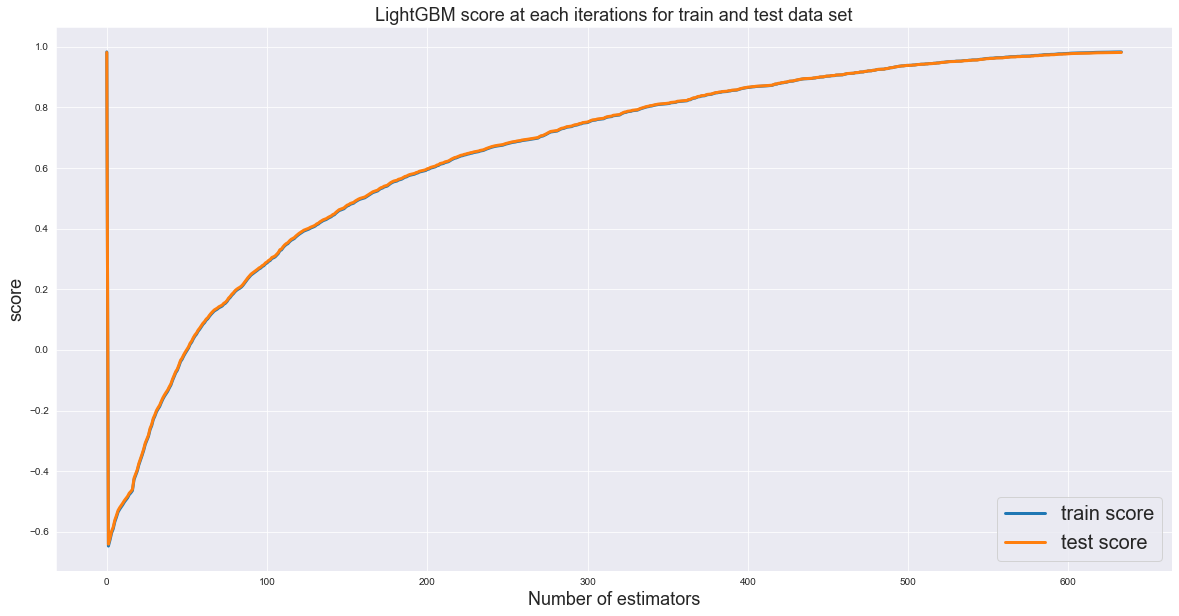

In [53]:

def get_score(actual,predict):
    #rmse = mean_squared_error(actual,predict,squared=False)
    score = r2_score(actual,predict)
    return score



lgb_train_score = [get_score(y_train,y_pred) for y_pred in [lgb_model.predict(x_train,num_iteration=i) for i in range(lgb_model.n_estimators)]]
lgb_test_score = [get_score(y_test,y_pred) for y_pred in [lgb_model.predict(x_test,num_iteration=i) for i in range(lgb_model.n_estimators)]]

plt.figure(figsize=(20,10))
plt.plot(range(lgb_model.n_estimators),lgb_train_score,label='train score',linewidth=3)
plt.plot(range(lgb_model.n_estimators),lgb_test_score,label='test score',linewidth=3)
plt.legend(prop={'size': 20})
plt.xlabel('Number of estimators',fontsize=18)
plt.ylabel('score',fontsize=18)
plt.title('LightGBM score at each iterations for train and test data set',fontsize=18)


### Question 24:
Perform 10-fold cross-validation and measure average RMSE errors for training and validation sets. Why is the training RMSE different from that of validation set? 

In [32]:
from sklearn.model_selection import KFold, StratifiedKFold

# Cross-validation prediction
folds = 10
skf = StratifiedKFold(n_splits=folds,
                      shuffle=True, 
                      random_state=0)

models = [RandomForestRegressor()]
model_names = ['Random Foreset']
X,y = get_X_y()
kfold_model_result = pd.DataFrame(columns=['Model','Train RMSE','Validation RMSE'])
for model,name in zip(models,model_names):
    train_rmse_score = list()
    test_rmse_score = list()
    for k, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        model.fit(X.iloc[train_idx, :], y[train_idx])
        val_preds = model.predict(X.iloc[val_idx, :])
        val_rmse = mean_squared_error(y_true=y[val_idx], y_pred=val_preds, squared=False)
        test_rmse_score.append(val_rmse)

        val_preds = model.predict(X.iloc[train_idx, :])
        val_rmse = mean_squared_error(y_true=y[train_idx], y_pred=val_preds, squared=False)
        train_rmse_score.append(val_rmse)


        #print(f"Fold {k} RMSE: {val_rmse:0.5f}")
    kfold_model_result.loc[len(kfold_model_result)] = [name,np.mean(train_rmse_score),np.mean(test_rmse_score)]

kfold_model_result

,Model,Train RMSE,Validation RMSE
0,Random Foreset,202.474702,538.738799


*As train, we check model against the validation set. So while the validation set never directly affects model parameters (whereas the training set does), thats why there is difference in train RMSE and validation RMSE score*

### Question 25:
For random forest model, measure “Out-of-Bag Error” (OOB) as well. Explain what OOB error and R2 score means given this link.

OOB score is computed as the number of correctly predicted rows from the out of bag sample.
As compared to the R2 score, OOB score is computed on data that was not necessarily used in the analysis of the model. Whereas for calculation R2 score, a part of the original training dataset is actually set aside before training the models. Additionally, the OOB score is calculated using only a subset of DTs not containing the OOB sample in their bootstrap training dataset. While the R2 score is calculated using all the DTs of the ensemble.

In [52]:
forest1 =  RandomForestRegressor(oob_score=True,
                               max_features=3,max_depth=4,
                               random_state=42)

forest1.fit(x_train,y_train)
oob_error = 1 - forest1.oob_score_
print(f"OOB score of the model : {oob_error}")                         

OOB score of the model : 0.08183519075462542


## Show Us Skills: Twitter Data

### Question 26:

Report the following statistics for each hashtag, i.e. each file

- Average number of tweets per hour
- Average number of followers of users posting the tweets per tweet (to make it simple, we average over the number of tweets; if a users posted twice, we count the user and the user’s followers twice as well)
- Average number of retweets per tweet

In [30]:
# read all six tweet files
import json
import datetime
import pandas as pd
tweet_files = ['tweets_#gohawks.txt','tweets_#gopatriots.txt',
                'tweets_#nfl.txt','tweets_#patriots.txt',
                'tweets_#sb49.txt','tweets_#superbowl.txt']

file_path = 'ECE219_tweet_data/'

hashtag_type = ['gohawks','gopatriots','nfl','patriots','sb49','superbowl']

def get_values(json_object):
    citation_date = datetime.datetime.fromtimestamp(json_object['citation_date'])
    retweets = json_object['metrics']['citations']['total']
    followers = json_object['author']['followers']
    return [citation_date,retweets,followers]

tweet_data = pd.DataFrame()
for hashtag,tweet_file in zip(hashtag_type,tweet_files):
    print(tweet_file)
    with open(file_path+tweet_file, 'r',encoding='utf-8') as file:
        lines = file.readlines()
    lines = list(map(json.loads, lines))
    lines = list(map(get_values,lines))

    df = pd.DataFrame(lines,columns = ['citation_date','retweets','followers'])
    df['hashtag'] = hashtag
    tweet_data = pd.concat([tweet_data,df],ignore_index=True)
     




tweets_#gohawks.txt
tweets_#gopatriots.txt
tweets_#nfl.txt
tweets_#patriots.txt
tweets_#sb49.txt
tweets_#superbowl.txt


In [31]:
tweet_data.head()

,citation_date,retweets,followers,hashtag
0,2015-01-17 23:49:38,5,1752.0,gohawks
1,2015-01-14 23:48:56,2,258.0,gohawks
2,2015-01-17 09:51:59,5,22.0,gohawks
3,2015-01-17 09:51:37,2,22.0,gohawks
4,2015-01-17 09:48:56,2,22.0,gohawks


,hashtag,avg_tweet
0,gohawks,298.802120
1,gopatriots,53.312925
2,nfl,399.010274
3,patriots,749.355442
4,sb49,1364.493578
5,superbowl,2078.446918


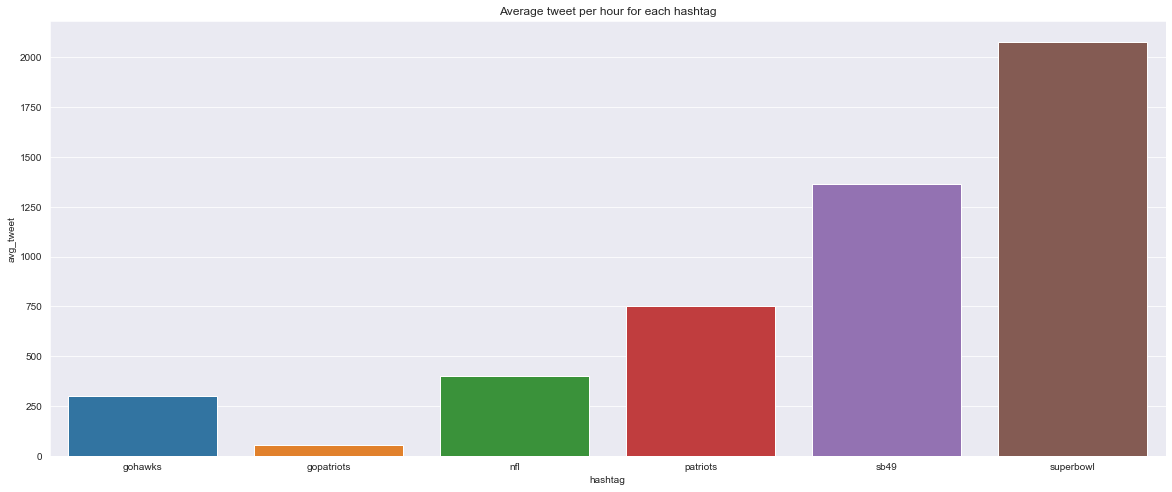

In [32]:
#Average number of tweets per hour
import seaborn as sns
import matplotlib.pyplot as plt
def get_avg_tweet_by_hour(df):
    res = df.groupby([pd.Grouper(key='citation_date',freq='H'),df.hashtag]).size().reset_index(name='count')
    res = res.groupby(['hashtag']).agg({'count':'mean'}).rename(columns={'count':'avg_tweet'}).reset_index()

    plt.figure(figsize=(20,8))
    sns.barplot(x='hashtag',y='avg_tweet',data=res)
    plt.title("Average tweet per hour for each hashtag")
    return res

get_avg_tweet_by_hour(tweet_data)

,hashtag,avg_followers
0,gohawks,2217.923736
1,gopatriots,1427.252605
2,nfl,4662.375445
3,patriots,3280.463562
4,sb49,10374.160292
5,superbowl,8814.967994


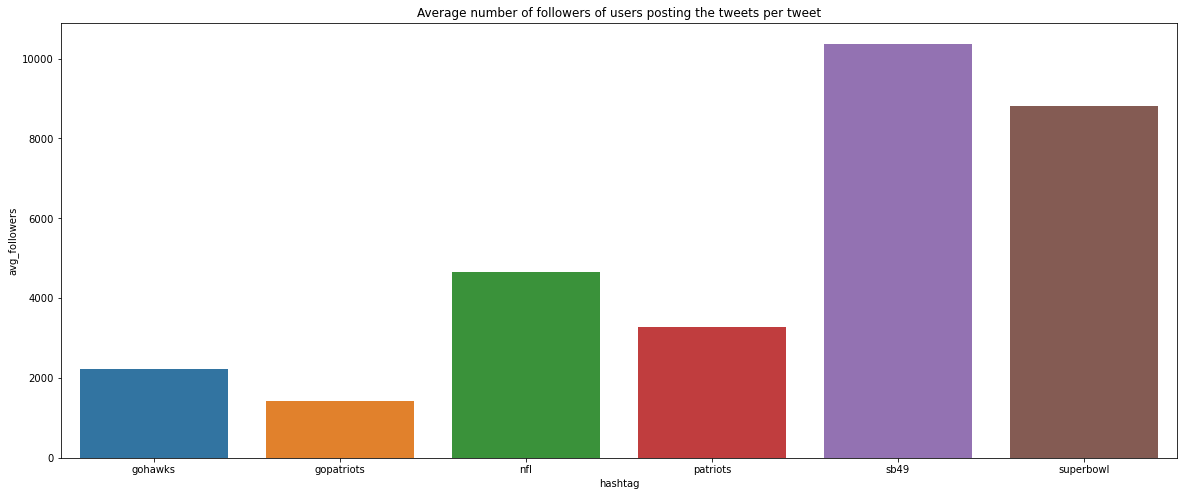

In [37]:
# Average number of followers of users posting the tweets per tweet 
def get_avg_follower_per_tweet(df):
    res = df.groupby(['hashtag']).agg({'followers':'mean'}).rename(columns={'followers':'avg_followers'}).reset_index()
    plt.figure(figsize=(20,8))
    sns.barplot(x='hashtag',y='avg_followers',data=res)
    plt.title("Average number of followers of users posting the tweets per tweet")
    return res

get_avg_follower_per_tweet(tweet_data)

,hashtag,avg_retweets
0,gohawks,2.013209
1,gopatriots,1.408192
2,nfl,1.534460
3,patriots,1.785287
4,sb49,2.527134
5,superbowl,2.391190


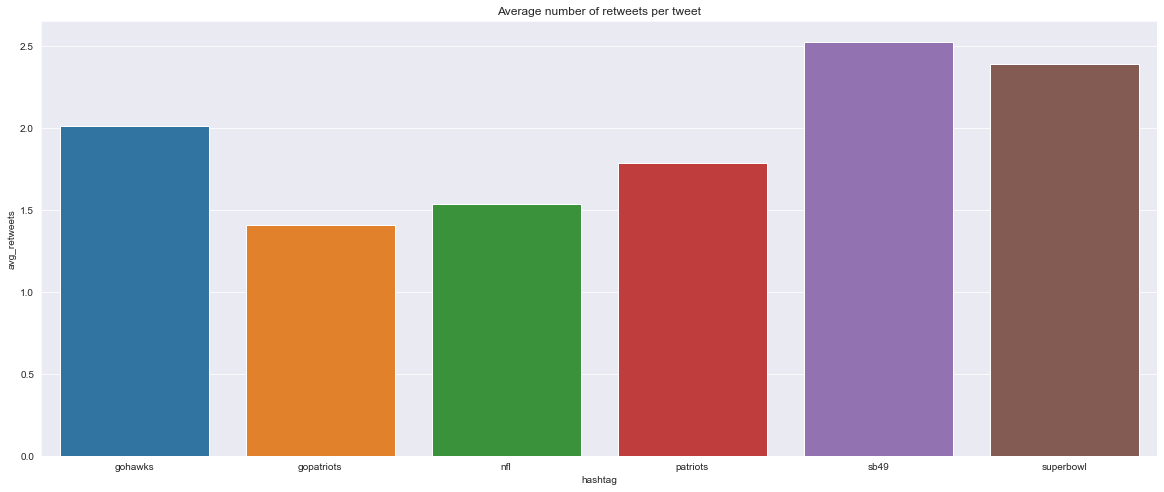

In [33]:
def get_avg_retweet_per_tweet(df):
    res = df.groupby(['hashtag']).agg({'retweets':'mean'}).rename(columns={'retweets':'avg_retweets'}).reset_index()
    plt.figure(figsize=(20,8))
    sns.barplot(x='hashtag',y='avg_retweets',data=res)
    plt.title("Average number of retweets per tweet")
    return res

get_avg_retweet_per_tweet(tweet_data)

### Question 27

Plot “number of tweets in hour” over time for #SuperBowl and #NFL (a bar plot with 1-hour bins). 

In [53]:

#tweet_data.set_index('citation_date', inplace=True)

tweet_data_superbowl_hour= tweet_data[tweet_data.hashtag=='superbowl'][['hashtag']].resample('H').count()
tweet_data_superbowl_hour = tweet_data_superbowl_hour.reset_index()
tweet_data_superbowl_hour['hour'] = tweet_data_superbowl_hour['citation_date'].dt.hour
tweet_data_superbowl_hour = tweet_data_superbowl_hour.groupby(['hour'])['hashtag'].sum()


tweet_data_nfl_hour= tweet_data[tweet_data.hashtag=='nfl']['hashtag'].resample('H').count()
tweet_data_nfl_hour = tweet_data_nfl_hour.reset_index()
tweet_data_nfl_hour['hour'] = tweet_data_nfl_hour['citation_date'].dt.hour
tweet_data_nfl_hour = tweet_data_nfl_hour.groupby(['hour'])['hashtag'].sum()

Text(0.5, 1.0, 'Number of tweet in hour over time for #SuperBow')

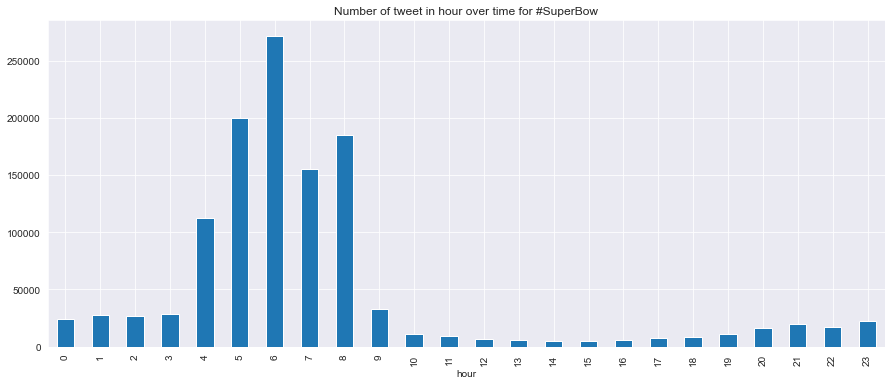

In [55]:
tweet_data_superbowl_hour.plot(kind='bar',figsize=(15,6))
plt.title('Number of tweet in hour over time for #SuperBow')

Text(0.5, 1.0, 'Number of tweet in hour over time for #NFL')

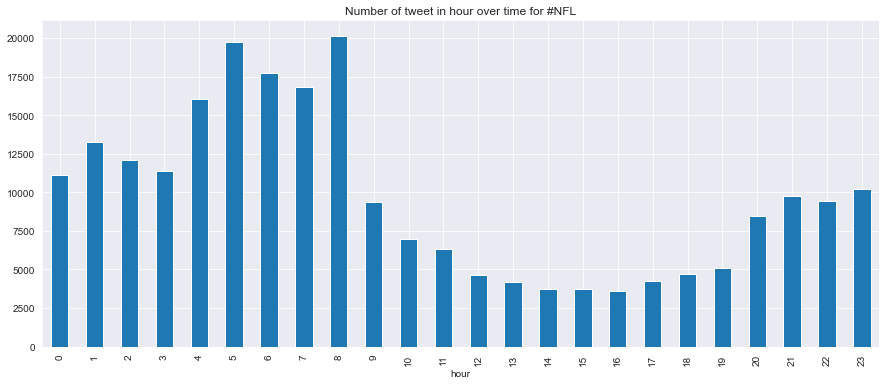

In [56]:
tweet_data_nfl_hour.plot(kind='bar',figsize=(15,6))
plt.title('Number of tweet in hour over time for #NFL')

### Question 28:

#### Retweet Predictive Model

##### Objective:

The main goal is to build a Retweet Predictive Model as well as show how different factors (i.e. Hashtags and URLs) will affect it. The objective of this model is to predict how many retweets will a tweet have. Based on reweet prediction we can see which type of hashtag will be popular in the next feature within #NFL .Our model will be based on a machine learning approach, which will use data from the author of the tweet, the characteristics of the message itself which includes Sentiment score.
There would be two outcome of the Predictive model:
1. Ability to predict the popularity of a tweet.
2. Ability to predict which hashtag will be going to more popular in the next future.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import json
import datetime

from sklearn.preprocessing import Normalizer


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##### Extract and Load NFL data 

In [2]:
tweet_files = [
                'tweets_#nfl.txt']

file_path = 'ECE219_tweet_data/'

hashtag_type = ['nfl']

def get_values(json_object):
    citation_date = datetime.datetime.fromtimestamp(json_object['citation_date'])
    retweets = json_object['metrics']['citations']['total']
    reply = json_object['metrics']['citations']['replies']
    followers = json_object['author']['followers']
    text = json_object['tweet']['text'].lower()
    tweet_type = json_object['type']
    favorite_count =  json_object['tweet']['favorite_count']
    hashtags = ','.join([hash['text'].lower() for hash in json_object['tweet']['entities']['hashtags']])
    user_mentions = len(json_object['tweet']['entities']['user_mentions'])
    n_hashtags = len(json_object['tweet']['entities']['hashtags'])
    n_urls = len(json_object['tweet']['entities']['urls'])
    if 'media' in json_object['tweet']['entities']:
        media = list(set([m['type'] for m in json_object['tweet']['entities']['media']]))
        media = ','.join(media)
        n_media = len(json_object['tweet']['entities']['media'])
    else:
        media = 'no media'
        n_media = 0
    
    friends_count = json_object['tweet']['user']['friends_count']
    user_followers_count = json_object['tweet']['user']['followers_count']
    user_favourites_count = json_object['tweet']['user']['favourites_count']
    return [citation_date,retweets,reply,followers,text,tweet_type,
            favorite_count,hashtags,
            user_mentions,n_hashtags,n_urls,media,
            n_media,friends_count,
            user_followers_count,user_favourites_count]

tweet_data = pd.DataFrame()
for hashtag,tweet_file in zip(hashtag_type,tweet_files):
    print(tweet_file)
    with open(file_path+tweet_file, 'r',encoding='utf-8') as file:
        lines = file.readlines()
    lines = list(map(json.loads, lines))
    lines = list(map(get_values,lines))

    df = pd.DataFrame(lines,columns = ['citation_date','retweets','reply','followers',
                                            'text','tweet_type','favorite_count',
                                            'hashtags','user_mentions','n_hashtags',
                                            'n_urls','media','n_media',
                                            'friends_count',
                                            'user_followers_count','user_favourites_count'])
    #df['hashtag'] = hashtag
    tweet_data = pd.concat([tweet_data,df],ignore_index=True)
#tweet_data.to_csv('nfl_tweet_data.csv',index=False)

tweets_#nfl.txt


##### Feature Engineering

Selecting a good set features is an important process to represent a prediction model. Below are the features which has been created.

**Text Length and number of words:** These features, respectively indicate the length and number of words in a tweet.<br>
**Hour of the tweet:** This feature indicates the hour when the tweet was tweeted, different hours have different numbers of tweets.<br>
**Day of week of the tweet:** This feature indicates the week day when the tweet was tweeted, different weekday have different number of tweets.<br>

In [3]:
# calculate the length of tweet
tweet_data['tweet_length'] = tweet_data['text'].apply(lambda x: len(x))

# calculate number of words in the tweet
tweet_data['tweet_words'] = tweet_data['text'].apply(lambda x: len(x.split()))

# extract hour from the date
tweet_data['hour'] = tweet_data['citation_date'].dt.hour

# extract week day from the date
tweet_data['weekday'] = tweet_data['citation_date'].dt.dayofweek

##### Exploratory Data Analysis

- Find top 30 hashtag in NFL hashtag tweet dataset

<AxesSubplot:>

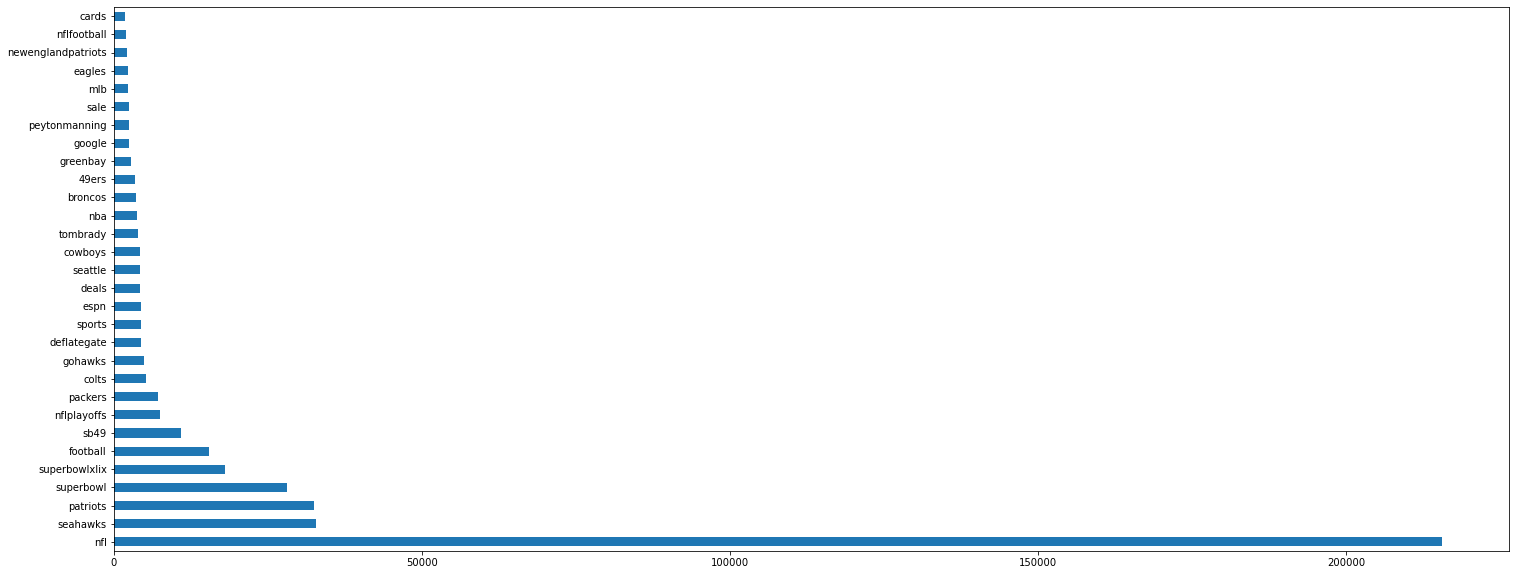

In [4]:
hashtag_list = [hashtags.split(',') for hashtags in tweet_data['hashtags'].tolist()]
hashtag_list = [j for sub in hashtag_list for j in sub]
pd.Series(hashtag_list).value_counts()[:30].plot(kind='barh',figsize=(25,10))

- Find the popularity of top hashtag based on average retweet

Text(0.5, 1.0, 'Popular hashtag of #NFL related tweet based on average retweet')

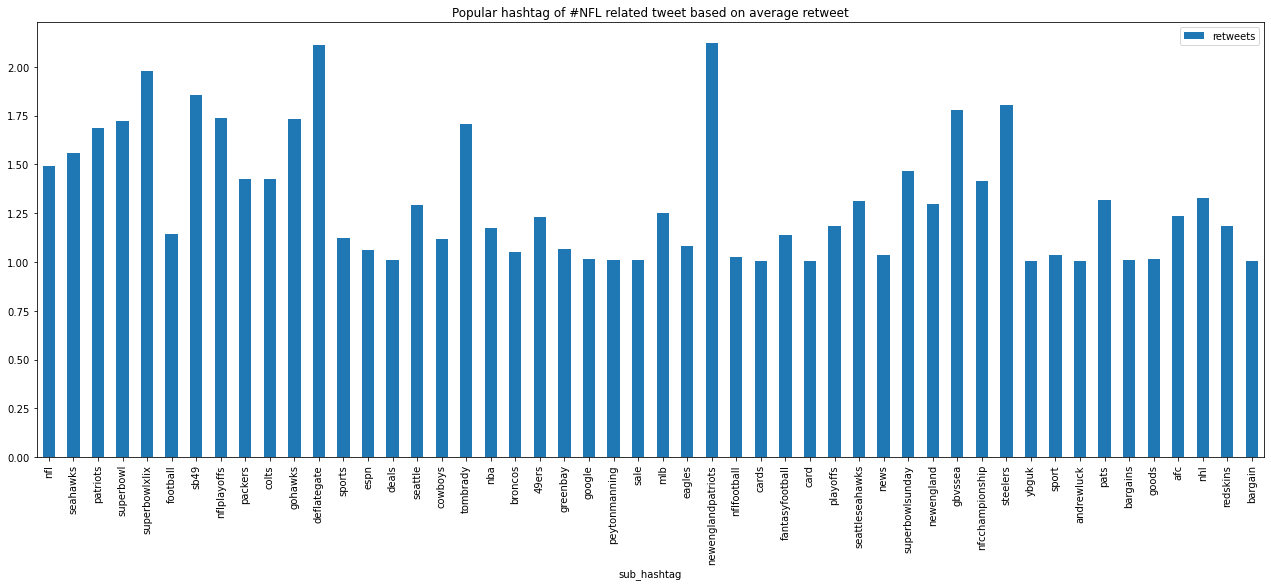

In [5]:
top_hash_tag = pd.Series(hashtag_list).value_counts()[:50].index.to_list()
popularity_df = pd.DataFrame(columns=['sub_hashtag','retweets'])
for hash_tag in top_hash_tag:
    tweet_data['sub_hashtag'] = tweet_data['hashtags'].apply(lambda x: 1 if hash_tag in x.split(',') else 0)
    df = tweet_data.groupby(['sub_hashtag']).agg({'retweets':'mean'}).reset_index()
    df = df[df.sub_hashtag == 1]
    df['sub_hashtag'] = hash_tag
    popularity_df = pd.concat([popularity_df,df],ignore_index=True)

popularity_df.set_index('sub_hashtag').plot(kind='bar',figsize=(22,8))
plt.title('Popular hashtag of #NFL related tweet based on average retweet')

- Average number of retweet distribution over hourly

Text(0.5, 1.0, 'Number of average retweet in hour')

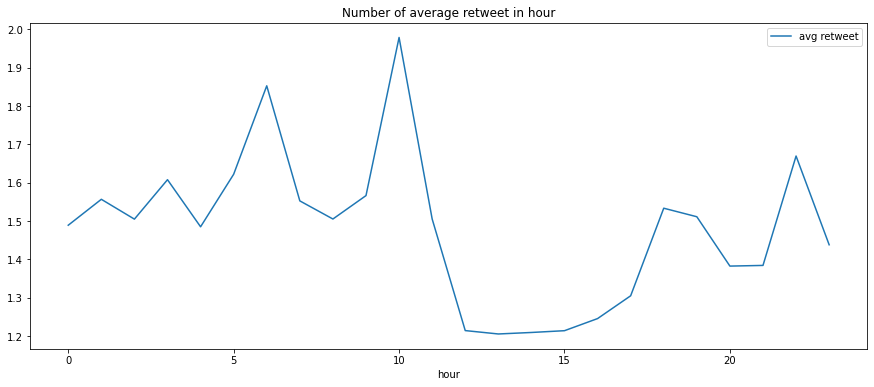

In [6]:
tweet_data_nfl_hour = tweet_data.groupby(['hour']).agg({'retweets':'mean'}).rename(columns={'retweets':'avg retweet'})
tweet_data_nfl_hour.plot(figsize=(15,6))
plt.title('Number of average retweet in hour')

- Average number of retweet distribution over day of week

Text(0.5, 1.0, 'Number of average retweet in weekday')

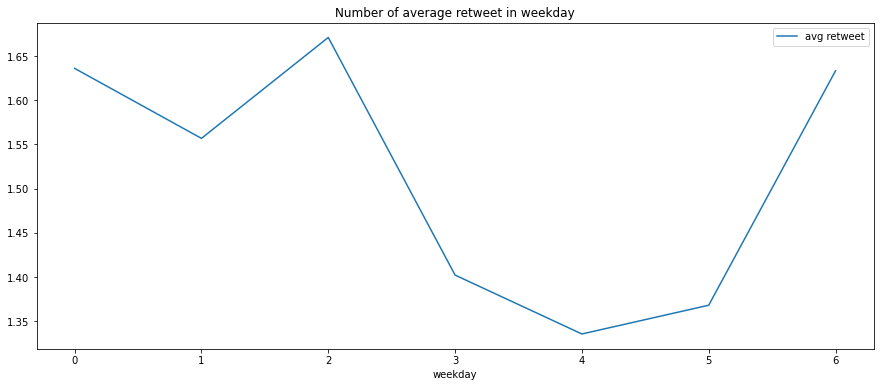

In [7]:
tweet_data_nfl_weekday = tweet_data.groupby(['weekday']).agg({'retweets':'mean'}).rename(columns={'retweets':'avg retweet'})
tweet_data_nfl_weekday.plot(figsize=(15,6))
plt.title('Number of average retweet in weekday')

- Box plot over categorical feature 

Text(0.5, 1.0, 'Distribution over weekday')

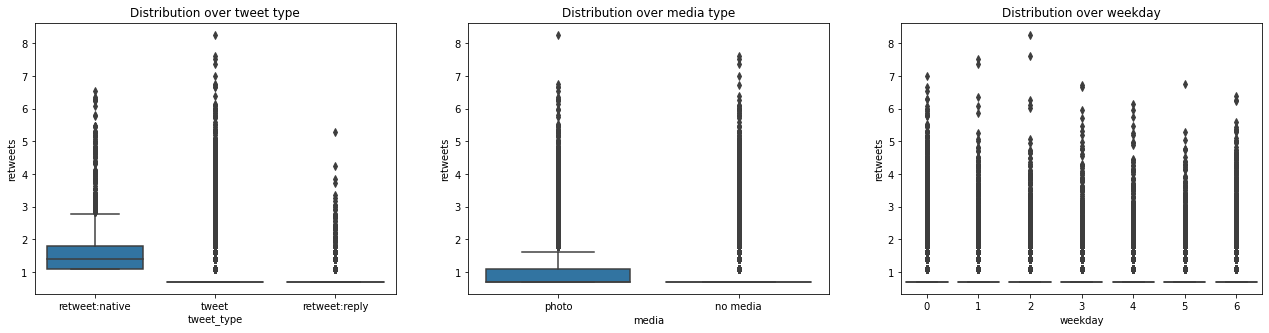

In [8]:
cat_features = ['tweet_type','media','weekday']

fig,axs = plt.subplots(1,3,figsize=(22,5))

sns.boxplot(x=tweet_data['tweet_type'],y=np.log1p(tweet_data['retweets']),ax=axs[0])
axs[0].set_title('Distribution over tweet type')

sns.boxplot(x=tweet_data['media'],y=np.log1p(tweet_data['retweets']),ax=axs[1])
axs[1].set_title('Distribution over media type')

sns.boxplot(x=tweet_data['weekday'],y=np.log1p(tweet_data['retweets']),ax=axs[2])
axs[2].set_title('Distribution over weekday')

- Correlation of the features 

<AxesSubplot:>

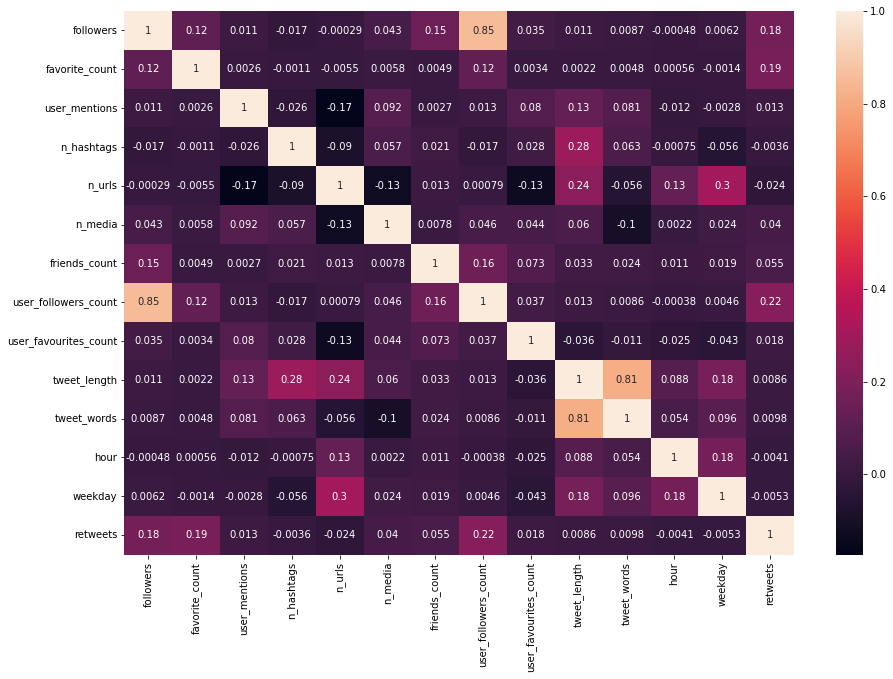

In [9]:
cat_col = ['tweet_type','media']
num_col = ['followers','favorite_count','user_mentions',
            'n_hashtags','n_urls','n_media',
            'friends_count','user_followers_count','user_favourites_count',
            'tweet_length','tweet_words','hour','weekday','retweets']


# Find correlaitons
plt.figure(figsize=(15,10))
cor = tweet_data[num_col].corr()
sns.heatmap(cor,annot=True)

In [10]:
# there are many ones in number of retweets so target variable is bais thats why we are doing sampling to reduce ones in the tweet_data
ones_tweet_data = tweet_data[tweet_data.retweets<=2].sample(8000)
other_tweet_data = tweet_data[tweet_data.retweets > 2]

tweet_data = pd.concat([ones_tweet_data,other_tweet_data],ignore_index= True).sample(frac=1).reset_index(drop=True)

In [11]:
# Define the category of retweets
def categorize_retweet(x):
    if x <= 2:
        return 1
    elif x>2 and x<=8:
        return 2
    else:
        return 3

tweet_data['cat_retweet'] = tweet_data['retweets'].map(categorize_retweet)
tweet_data['cat_retweet'].value_counts(normalize = True)

2    0.486084
1    0.409291
3    0.104625
Name: cat_retweet, dtype: float64

##### Data-preprocessing on tweet for calculating the sentiment score
1. lower case
2. remove alpha numeric
3. remove punctuations
4. lematization
5. remove stopwords

In [12]:
# tweet text cleaning

import string
import re
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

def clean_text(text,stop_word=True):
    # make text lower case
    text = text.lower()
    
    # Remove digits and alpha numeric words
    text = re.sub('\w*\d\w*','', text)
    
    # Remove punctuations
    #string.punctuation => '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    # Remove extra space
    text = re.sub(' +',' ',text)
    
    text = text.split()
    
    # Lemmatize the text
    lm = WordNetLemmatizer()
    text = [lm.lemmatize(w) for w in text]
    
    # Remove stopwords
    if stop_word:
        text = [word for word in text if word not in stopwords.words('english')]

    text = ' '.join(text)
    
    return text

tweet_data['clean_text'] = tweet_data['text'].apply(lambda x : clean_text(x))

##### Calculating the sentiment score

In [13]:
# Create sentiments score for each tweet
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

sentiment_scores = tweet_data['clean_text'].apply(sid.polarity_scores)

tweet_data['sentiment_score'] = sentiment_scores.apply(lambda x : x['compound'])

##### Data Preparation to implement the predictive model

In [14]:
from sklearn.model_selection import train_test_split


def onehot_encoding(data,column):
    data = pd.get_dummies(data,columns=column)
    return data

def standardization(x_train,x_test,columns):
    scaler = Normalizer()
    x_train[columns] = scaler.fit_transform(x_train[columns])
    x_test[columns] = scaler.transform(x_test[columns])
    return x_train,x_test


tweet_data['id'] = tweet_data.index
train_data = tweet_data[cat_col+['cat_retweet','id']+num_col+['sentiment_score']]

std_col = ['followers','favorite_count','user_mentions',
            'n_hashtags','n_urls','n_media',
            'friends_count','user_followers_count','user_favourites_count',
            'tweet_length','tweet_words']

# apply onehot encoding on categorical variable
train_data = onehot_encoding(train_data,cat_col)

# Define feature and target variable
X = train_data.drop(columns=['retweets','cat_retweet'])
y = train_data['cat_retweet']

# splilt data into train and test 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
x_train=x_train.drop(columns=['id'])
x_test=x_test.drop(columns=['id'])
# standardization
x_train,x_test = standardization(x_train,x_test,std_col)

##### Build the baseline model

In [15]:
# Buid Logitic Regression model as baseline classifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def tweet_model_evalution(model,name,xtrain,ytrain,xtest,ytest):
    ypred = model.predict(xtrain)
    train_ps = precision_score(ytrain,ypred,average="macro")
    train_rs = recall_score(ytrain,ypred,average="macro")
    train_f1 = f1_score(ytrain,ypred,average="macro")
    train_acc = accuracy_score(ytrain,ypred)

    ypred = model.predict(xtest)
    test_ps = precision_score(ytest,ypred,average="macro")
    test_rs = recall_score(ytest,ypred,average="macro")
    test_f1 = f1_score(ytest,ypred,average="macro")
    test_acc = accuracy_score(ytest,ypred)

    return [name,train_ps,train_rs,train_f1,train_acc ,test_ps,test_rs,test_f1,test_acc]

nb = LogisticRegression()
nb.fit(x_train,y_train)

tweet_model_result = pd.DataFrame(columns = ['Model','Train Precision','Train Recall','Train F1_Score','Train Accuracy',
                                                    'Test Precision','Test Recall','Test F1_Score','Test Accuracy'])

tweet_model_result.loc[len(tweet_model_result)] = tweet_model_evalution(nb,'Logistic Regression',x_train,y_train,x_test,y_test)
tweet_model_result

,Model,Train Precision,Train Recall,Train F1_Score,Train Accuracy,Test Precision,Test Recall,Test F1_Score,Test Accuracy
0,Logistic Regression,0.682832,0.478025,0.47713,0.624543,0.668394,0.482921,0.476431,0.638813


##### Train Random Foreset model with fine tune the hyperparameters

In [16]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state = 42)
param_grid = {
    'n_estimators': [150,180],
    'max_features': [3,5,8],
    'max_depth': [10,12]
    }

rf_grid = GridSearchCV(rf, param_grid, cv=5)
rf_grid.fit(x_train, y_train)

tweet_model_result.loc[len(tweet_model_result)] = tweet_model_evalution(rf_grid,'Random Forest',x_train,y_train,x_test,y_test)
print(f"Best parameters : {rf_grid.best_params_}")
tweet_model_result

Best parameters : {'max_depth': 12, 'max_features': 3, 'n_estimators': 150}


,Model,Train Precision,Train Recall,Train F1_Score,Train Accuracy,Test Precision,Test Recall,Test F1_Score,Test Accuracy
0,Logistic Regression,0.682832,0.478025,0.477130,0.624543,0.668394,0.482921,0.476431,0.638813
1,Random Forest,0.888113,0.736768,0.777433,0.836939,0.738358,0.602580,0.623790,0.738404


##### Important features from RF model

<BarContainer object of 19 artists>

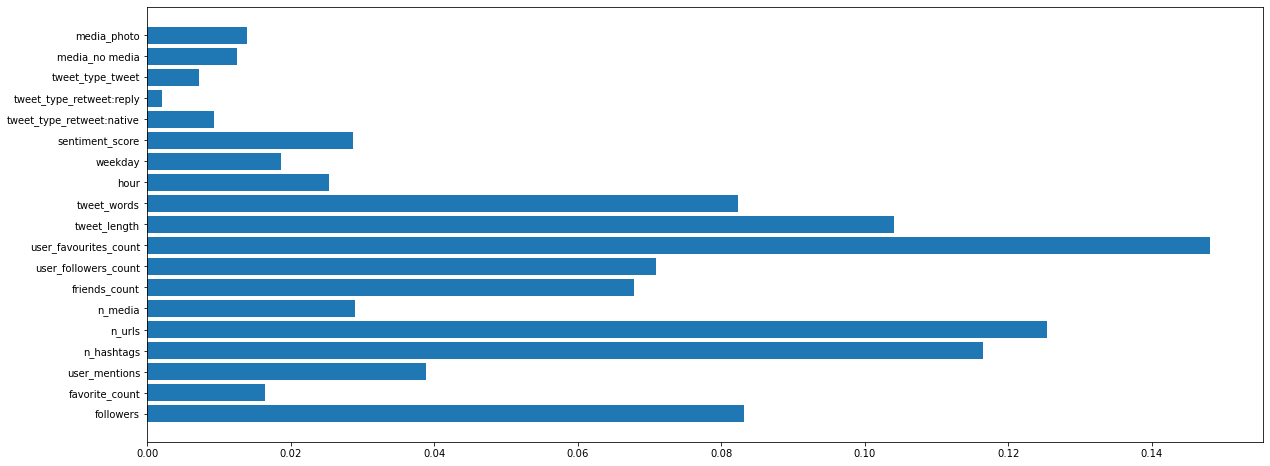

In [17]:
# find the important features
plt.figure(figsize=(20,8))
plt.barh(x_train.columns, rf_grid.best_estimator_.feature_importances_)

#### Conclusion:

We built a Retweet Predictive Model, this model predicts the popularity level of a tweet. `user favourites count`, `number of url in the tweet`, `number of hashtag in the tweet`, `tweet lenght`, `tweet word`, `followers` are coming important features from the model. These features explain the popularity of the tweet. As we can see, if there are more url, hashtag, more words in the tweet and more followers then that tweet will become more popular. We can find that which tweet can be popular or which hashtag will be going more famous in the next future. Below graph explain which hashtag will be famous based on retweet category.

Text(0.5, 1.0, 'Future Popular hashtag of #NFL')

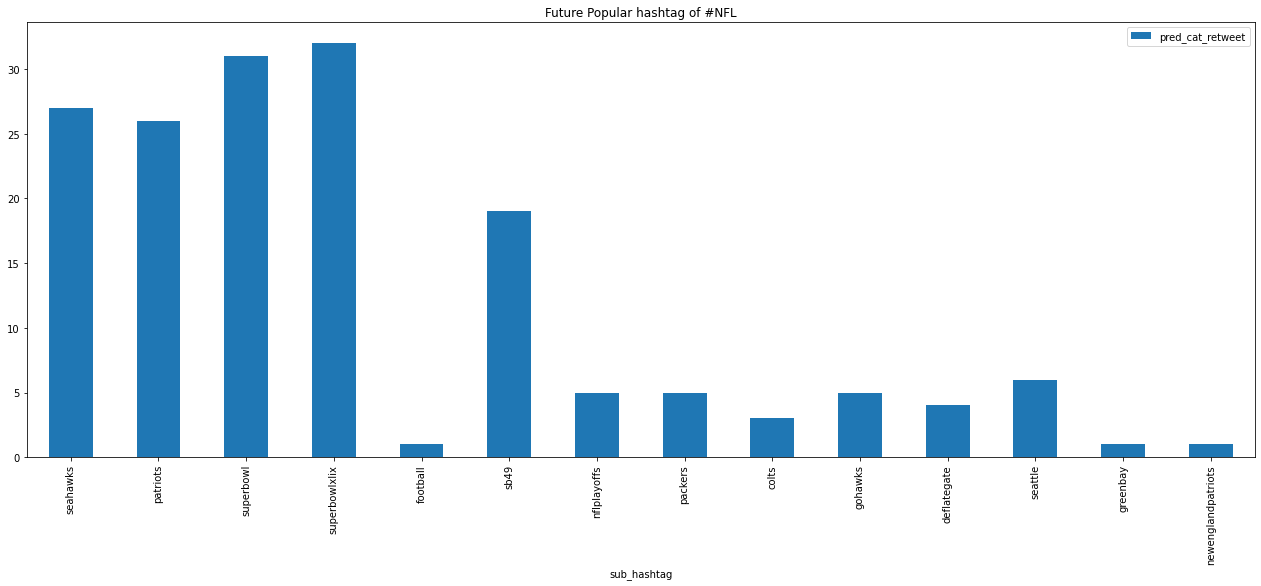

In [19]:
# We will filter predictive class with 3 becasue this is the retweet range greater than 8.

ypred = rf_grid.predict(x_test[x_train.columns])

x_test['cat_retweet'] = y_test
x_test['pred_cat_retweet'] = ypred
x_test['id'] = x_test.index
test_data = pd.merge(x_test,tweet_data,how='inner',on='id')
test_data_class3 = test_data[test_data.pred_cat_retweet==3]
top_hash_tag = pd.Series(hashtag_list).value_counts()[1:30].index.to_list()
popularity_df = pd.DataFrame(columns=['sub_hashtag','pred_cat_retweet'])
for hash_tag in top_hash_tag:
    test_data_class3['sub_hashtag'] = test_data_class3['hashtags'].apply(lambda x: 1 if hash_tag in x.split(',') else 0)
    df = test_data_class3.groupby(['sub_hashtag']).agg({'pred_cat_retweet':'count'}).reset_index()
    df = df[df.sub_hashtag == 1]
    df['sub_hashtag'] = hash_tag
    popularity_df = pd.concat([popularity_df,df],ignore_index=True)

popularity_df.set_index('sub_hashtag').plot(kind='bar',figsize=(22,8))
plt.title('Future Popular hashtag of #NFL')

*From the above plot, we found that `#superbowl`, `#seahawks` and `#patriots` will be going to more famous in the next future*